# **Introduction**

Cyclistic bikeshare analysis case study is part of Google Data Analytics Capstone - Complete a Case study project. The objective of this case study is to perform some real-world tasks of a junior data analyst. In order to answer the key business questions, the steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act** has been followed.

Cyclistic’s historical trip dataset is provided by Motivate International Inc. under the [license](https://ride.divvybikes.com/data-license-agreement). Motivate International Inc. (“Motivate”) operates the City of Chicago’s (“City”) Divvy bicycle sharing service.
The programming language used for analysis of the dataset is R.

# **Background**

Cyclistic is a fictional company launced in the year 2016. It provides bike-share services across a fleet of *5,824 bicycles* that are geotracked and locked into a network of *692 stations* across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Cyclistic provides flexibility in its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase *single-ride* or *full-day passes* are referred to as **casual riders**. Customers who purchase *annual memberships* are **Cyclistic members**.

Lily Moreno is The director of marketing. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

Business task: 
1. understand how casual riders and annual members use Cyclistic bikes differently.
2. design marketing strategies aimed at converting casual riders into annual members.
3. identify ways how digital media could affect marketing tactics.



# **Environment Setup**

In [1]:
# loading packages
library(tidyverse)
library(lubridate)

install.packages("formattable")
library(formattable)

install.packages("skimr")
library(skimr)

install.packages("geosphere")
library(geosphere)
library(sp)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’




# **Loading Dataset**

In [2]:
#loading partial dataset
df1 <- read.csv("202011-divvy-tripdata.csv")
df2 <- read.csv("202012-divvy-tripdata.csv")
df3 <- read.csv("202101-divvy-tripdata.csv")
df4 <- read.csv("202102-divvy-tripdata.csv")
df5 <- read.csv("202103-divvy-tripdata.csv")
df6 <- read.csv("202104-divvy-tripdata.csv")
df7 <- read.csv("202105-divvy-tripdata.csv")
df8 <- read.csv("202106-divvy-tripdata.csv")
df9 <- read.csv("202107-divvy-tripdata.csv")
df10 <- read.csv("202108-divvy-tripdata.csv")
df11 <- read.csv("202109-divvy-tripdata.csv")
df12 <- read.csv("202110-divvy-tripdata.csv")

In [3]:
#checking structure of partial datasets
str(df1)
str(df2)
str(df3)
str(df4)
str(df5)
str(df6)
str(df7)
str(df8)
str(df9)
str(df10)
str(df11)
str(df12)

'data.frame':	259716 obs. of  13 variables:
 $ ride_id           : chr  "BD0A6FF6FFF9B921" "96A7A7A4BDE4F82D" "C61526D06582BDC5" "E533E89C32080B9E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2020-11-01 13:36:00" "2020-11-01 10:03:26" "2020-11-01 00:34:05" "2020-11-01 00:45:16" ...
 $ ended_at          : chr  "2020-11-01 13:45:40" "2020-11-01 10:14:45" "2020-11-01 01:03:06" "2020-11-01 00:54:31" ...
 $ start_station_name: chr  "Dearborn St & Erie St" "Franklin St & Illinois St" "Lake Shore Dr & Monroe St" "Leavitt St & Chicago Ave" ...
 $ start_station_id  : int  110 672 76 659 2 72 76 NA 58 394 ...
 $ end_station_name  : chr  "St. Clair St & Erie St" "Noble St & Milwaukee Ave" "Federal St & Polk St" "Stave St & Armitage Ave" ...
 $ end_station_id    : int  211 29 41 185 2 76 72 NA 288 273 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -

In [4]:
#since the columns and datatypes of columns are same
#combining partial datsets into a single dataset
df <- rbind(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12)

In [5]:
# removing partial datasets
remove(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12)

In [6]:
#dimension of combined dataset
dim(df)

[1] 5378834      13

In [7]:
#peek of first 6 rows of the combined dataset
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.89418,-87.62913,41.89443,-87.62338,casual
2,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.89096,-87.63534,41.90067,-87.66248,casual
3,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.88098,-87.61675,41.87205,-87.62955,casual
4,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.89550,-87.68201,41.91774,-87.69139,casual
5,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.87650,-87.62036,41.87645,-87.62034,casual
6,7259585D8276D338,electric_bike,2020-11-14 15:55:17,2020-11-14 16:44:38,Wabash Ave & 16th St,72,Lake Shore Dr & Monroe St,76,41.86029,-87.62581,41.88099,-87.61677,casual


# **Data Transformation**

In [8]:
#start_start_id and end_station_id may appear as factor
#df <- mutate(df, start_station_id <- as.character(start_station_id), end_station_id <- as.character(end_station_id)) 
df$started_at <- ymd_hms(df$started_at)
df$ended_at <- ymd_hms(df$ended_at)

In [9]:
# get the day of the week from start_date
df$day_of_week <- weekdays(as.Date(df$started_at))

In [10]:
#days traveled between start date and end date
df$days_traveled <- difftime(df$ended_at, df$started_at, units= "days")
#total time traveled between start date and end date(in minutes)
df$trip_duration_min <- difftime(df$ended_at, df$started_at, units= "mins")

In [11]:
df$dist_km <- distHaversine(df[, 10:9], df[, 12:11])/1000

In [12]:
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<drtn>,<dbl>
1,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110,St. Clair St & Erie St,211,41.89418,-87.62913,41.89443,-87.62338,casual,Sunday,0.006712963 days,9.666667 mins,0.477177628
2,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672,Noble St & Milwaukee Ave,29,41.89096,-87.63534,41.90067,-87.66248,casual,Sunday,0.007858796 days,11.316667 mins,2.495271185
3,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76,Federal St & Polk St,41,41.88098,-87.61675,41.87205,-87.62955,casual,Sunday,0.020150463 days,29.016667 mins,1.453539284
4,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659,Stave St & Armitage Ave,185,41.89550,-87.68201,41.91774,-87.69139,casual,Sunday,0.006423611 days,9.250000 mins,2.595382239
5,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2,Buckingham Fountain,2,41.87650,-87.62036,41.87645,-87.62034,casual,Sunday,0.023229167 days,33.450000 mins,0.005700996
6,7259585D8276D338,electric_bike,2020-11-14 15:55:17,2020-11-14 16:44:38,Wabash Ave & 16th St,72,Lake Shore Dr & Monroe St,76,41.86029,-87.62581,41.88099,-87.61677,casual,Saturday,0.034270833 days,49.350000 mins,2.422501208


# **Data Cleaning**

In [13]:
#rename column names
df  <- rename(df, bike_type = rideable_type,
usertype = member_casual)

In [14]:
# change columns to lowercase, if not
df <- rename_with(df, tolower)

In [15]:
# remove NA values
df <- na.omit(df)

In [16]:
# keep only distict values across all rows of the dataset
df <- distinct(df)

In [17]:
#for people who book bike but don't use it, if exist
temp1 <- df %>%  # for future analysis
  filter(trip_duration_min == 0, dist_km == 0)  

In [18]:
# check for null values
head(filter(df, start_station_name == "" , end_station_name == ""))

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<drtn>,<dbl>
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,,,,,41.93,-87.70,41.91,-87.70,member,Friday,0.004907407 days,7.066667 mins,2.226390
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,,,,,41.91,-87.69,41.93,-87.70,member,Tuesday,0.004803241 days,6.916667 mins,2.375479
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,,,,,41.92,-87.70,41.91,-87.70,member,Tuesday,0.004085648 days,5.883333 mins,1.113195
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,,,,,41.80,-87.59,41.80,-87.59,member,Tuesday,0.001875000 days,2.700000 mins,0.000000
5,C1DECC4AB488831C,electric_bike,2020-12-22 13:26:37,2020-12-22 13:34:50,,,,,41.80,-87.59,41.78,-87.60,member,Tuesday,0.005706019 days,8.216667 mins,2.376067
6,B014A60B856C02B1,electric_bike,2020-12-03 16:23:48,2020-12-03 16:33:39,,,,,41.80,-87.59,41.78,-87.60,member,Thursday,0.006840278 days,9.850000 mins,2.376067


In [19]:
count(filter(df, start_station_name == ""), bike_type, usertype, sort = TRUE)

bike_type,usertype,n
<chr>,<chr>,<int>
electric_bike,member,296778
electric_bike,casual,279377


In [20]:
count(filter(df, end_station_name == ""), bike_type, usertype, sort = TRUE)

bike_type,usertype,n
<chr>,<chr>,<int>
electric_bike,casual,315880
electric_bike,member,295133
classic_bike,member,2340
classic_bike,casual,1822


There could be a possible reason for having most null values in start station name and end station name among electric bike users (casual users mostly). For now we discard them from the dataset.

In [21]:
#remove null values
df <- df[!(df$end_station_name == "" | df$end_station_id == "" | df$start_station_name =="" | df$start_station_id ==""), ]

In [22]:
unique(df$bike_type)

[1] "electric_bike" "docked_bike"   "classic_bike"

In [23]:
unique(df$usertype)

[1] "casual" "member"

In [24]:
unique(df$day_of_week)

[1] "Sunday"    "Saturday"  "Friday"    "Wednesday" "Tuesday"   "Monday"   
[7] "Thursday"

In [25]:
unique(df$end_station_name)

[1] "St. Clair St & Erie St"                               
  [2] "Noble St & Milwaukee Ave"                             
  [3] "Federal St & Polk St"                                 
  [4] "Stave St & Armitage Ave"                              
  [5] "Buckingham Fountain"                                  
  [6] "Lake Shore Dr & Monroe St"                            
  [7] "Wabash Ave & 16th St"                                 
  [8] "Larrabee St & Armitage Ave"                           
  [9] "Michigan Ave & 18th St"                               
 [10] "Lakeview Ave & Fullerton Pkwy"                        
 [11] "Clark St & Schiller St"                               
 [12] "Damen Ave & Cullerton St"                             
 [13] "Wood St & Hubbard St"                                 
 [14] "Southport Ave & Clybourn Ave"                         
 [15] "Clark St & Armitage Ave"                              
 [16] "Sedgwick St & Webster Ave"                            
 [17] "Montrose Harbor"                                      
 [18] "Ashland Ave & Grace St"                               
 [19] "Cannon Dr & Fullerton Ave"                            
 [20] "Greenwood Ave & 47th St"                              
 [21] "Southport Ave & Belmont Ave"                          
 [22] "Clark St & Montrose Ave"                              
 [23] "Lake Shore Dr & Wellington Ave"                       
 [24] "Sheffield Ave & Wellington Ave"                       
 [25] "Bernard St & Elston Ave"                              
 [26] "Franklin St & Lake St"                                
 [27] "Lakefront Trail & Bryn Mawr Ave"                      
 [28] "Clark St & Elm St"                                    
 [29] "Larrabee St & Webster Ave"                            
 [30] "Wells St & Huron St"                                  
 [31] "Damen Ave & Wellington Ave"                           
 [32] "Canal St & Harrison St"                               
 [33] "Shore Dr & 55th St"                                   
 [34] "Fort Dearborn Dr & 31st St"                           
 [35] "Western Ave & Walton St"                              
 [36] "Clark St & Randolph St"                               
 [37] "Southport Ave & Waveland Ave"                         
 [38] "Sheffield Ave & Webster Ave"                          
 [39] "Lake Shore Dr & Diversey Pkwy"                        
 [40] "Stockton Dr & Wrightwood Ave"                         
 [41] "Broadway & Barry Ave"                                 
 [42] "Campbell Ave & North Ave"                             
 [43] "Fairbanks Ct & Grand Ave"                             
 [44] "Burling St & Diversey Pkwy"                           
 [45] "Lake Shore Dr & Ohio St"                              
 [46] "Broadway & Belmont Ave"                               
 [47] "Greenview Ave & Fullerton Ave"                        
 [48] "Loomis St & Archer Ave"                               
 [49] "Kimbark Ave & 53rd St"                                
 [50] "Canal St & Jackson Blvd"                              
 [51] "Larrabee St & Division St"                            
 [52] "Paulina Ave & North Ave"                              
 [53] "Southport Ave & Wrightwood Ave"                       
 [54] "Columbus Dr & Randolph St"                            
 [55] "State St & Kinzie St"                                 
 [56] "Ashland Ave & 13th St"                                
 [57] "Racine Ave & 18th St"                                 
 [58] "Clark St & Bryn Mawr Ave"                             
 [59] "California Ave & Byron St"                            
 [60] "Peoria St & Jackson Blvd"                             
 [61] "Michigan Ave & 8th St"                                
 [62] "Wabash Ave & 9th St"                                  
 [63] "Clinton St & Roosevelt Rd"                            
 [64] "Halsted St & Clybourn Ave"                            
 [65] "Leavitt St & Belmont Ave"  

In [26]:
unique(df$start_station_name)

[1] "Dearborn St & Erie St"                                
  [2] "Franklin St & Illinois St"                            
  [3] "Lake Shore Dr & Monroe St"                            
  [4] "Leavitt St & Chicago Ave"                             
  [5] "Buckingham Fountain"                                  
  [6] "Wabash Ave & 16th St"                                 
  [7] "Marshfield Ave & Cortland St"                         
  [8] "Clark St & 9th St (AMLI)"                             
  [9] "Michigan Ave & 8th St"                                
 [10] "Lakeview Ave & Fullerton Pkwy"                        
 [11] "Mies van der Rohe Way & Chicago Ave"                  
 [12] "Western Ave & 21st St"                                
 [13] "Damen Ave & Cullerton St"                             
 [14] "Wells St & Polk St"                                   
 [15] "Paulina Ave & North Ave"                              
 [16] "Montrose Harbor"                                      
 [17] "Theater on the Lake"                                  
 [18] "Ashland Ave & Grace St"                               
 [19] "Dusable Harbor"                                       
 [20] "Greenwood Ave & 47th St"                              
 [21] "Sheffield Ave & Wellington Ave"                       
 [22] "Southport Ave & Waveland Ave"                         
 [23] "Clark St & Montrose Ave"                              
 [24] "Damen Ave & Pierce Ave"                               
 [25] "Morgan St & Lake St"                                  
 [26] "Lakefront Trail & Bryn Mawr Ave"                      
 [27] "Larrabee St & Webster Ave"                            
 [28] "Wells St & Elm St"                                    
 [29] "Wilton Ave & Diversey Pkwy"                           
 [30] "Lincoln Ave & Fullerton Ave"                          
 [31] "Noble St & Milwaukee Ave"                             
 [32] "Delano Ct & Roosevelt Rd"                             
 [33] "Damen Ave & Thomas St (Augusta Blvd)"                 
 [34] "Lake Park Ave & 53rd St"                              
 [35] "Western Ave & Walton St"                              
 [36] "Michigan Ave & 14th St"                               
 [37] "Stave St & Armitage Ave"                              
 [38] "Clark St & Randolph St"                               
 [39] "Halsted St & Wrightwood Ave"                          
 [40] "Wood St & Milwaukee Ave"                              
 [41] "New St & Illinois St"                                 
 [42] "Stockton Dr & Wrightwood Ave"                         
 [43] "Southport Ave & Wellington Ave"                       
 [44] "Franklin St & Monroe St"                              
 [45] "Wells St & Huron St"                                  
 [46] "Racine Ave & Belmont Ave"                             
 [47] "Lake Shore Dr & Diversey Pkwy"                        
 [48] "Streeter Dr & Grand Ave"                              
 [49] "Racine Ave & Fullerton Ave"                           
 [50] "Broadway & Belmont Ave"                               
 [51] "Kimbark Ave & 53rd St"                                
 [52] "Emerald Ave & 31st St"                                
 [53] "Michigan Ave & 18th St"                               
 [54] "St. Clair St & Erie St"                               
 [55] "Lincoln Ave & Roscoe St"                              
 [56] "Clark St & Armitage Ave"                              
 [57] "LaSalle Dr & Huron St"                                
 [58] "Southport Ave & Wrightwood Ave"                       
 [59] "State St & Kinzie St"                                 
 [60] "Columbus Dr & Randolph St"                            
 [61] "Racine Ave & 18th St"                                 
 [62] "Ashland Ave & 13th St"                                
 [63] "Sheridan Rd & Montrose Ave"                           
 [64] "Leavitt St & Lawrence Ave"                            
 [65] "Halsted St & Roscoe St"    

In [27]:
head(filter(df, start_station_name == "351"))   #accidentally start_station_name = 351(same as its id)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<drtn>,<dbl>
1,5E181D51F7C391F4,electric_bike,2021-08-04 16:31:29,2021-08-04 16:48:33,351,351,Mulligan Ave & Wellington Ave,351,41.93,-87.78,41.93,-87.78,casual,Wednesday,0.01185185 days,17.06667 mins,0


In [28]:
head(filter(df, start_station_id == "351"), 4)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<drtn>,<dbl>
1,EB7281349C65D0F3,electric_bike,2020-11-11 16:44:44,2020-11-11 16:53:50,Cottage Grove Ave & 51st St,351,Ellis Ave & 60th St,426,41.80298,-87.60657,41.78514,-87.60108,casual,Wednesday,0.006319444 days,9.100000 mins,2.0376489
2,E3171A65825A5EC6,electric_bike,2020-11-21 21:51:38,2020-11-21 21:56:15,Cottage Grove Ave & 51st St,351,Calumet Ave & 51st St,415,41.80303,-87.60660,41.80224,-87.61808,casual,Saturday,0.003206019 days,4.616667 mins,0.9571161
3,8F32C2B407EC2D72,electric_bike,2020-11-08 16:18:45,2020-11-08 16:25:10,Cottage Grove Ave & 51st St,351,Ellis Ave & 55th St,420,41.80292,-87.60647,41.79431,-87.60147,member,Sunday,0.004456019 days,6.416667 mins,1.0446574
4,41DEA6CEE8C89DEF,docked_bike,2020-11-26 11:35:19,2020-11-26 11:45:51,Cottage Grove Ave & 51st St,351,Ellis Ave & 60th St,426,41.80304,-87.60662,41.78510,-87.60107,member,Thursday,0.007314815 days,10.533333 mins,2.0494507


In [29]:
# replacing start station id 351 with its station name
df$start_station_name <- ifelse(df$start_station_name == "351", "Cottage Grove Ave & 51st St", df$start_station_name)

In [30]:
# convert start and end station name from uppercase letters to lowercase
df <- filter(df, str_detect(start_station_name, "[:lower:]"))
df <- filter(df, str_detect(end_station_name, "[:lower:]"))

In [31]:
is.numeric(df$trip_duration_min)
is.numeric(df$days_traveled)

[1] FALSE

[1] FALSE

In [32]:
# convert from difftime to numeric
df$trip_duration_min = as.numeric(df$trip_duration_min)
df$days_traveled = as.numeric(df$days_traveled) 

In [33]:
head(arrange(df, days_traveled))

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,3ED2B8BCE6A914EF,electric_bike,2020-12-15 12:10:14,2020-11-25 08:00:16,Wells St & Concord Ln,TA1308000050,Clark St & Schiller St,TA1309000024,41.91196,-87.63480,41.90792,-87.63158,member,Tuesday,-20.17359,-29049.97,0.52302547
2,6DF34F98F5DB335F,electric_bike,2020-12-15 11:35:39,2020-11-25 07:40:56,Sheffield Ave & Willow St,TA1306000032,Sheffield Ave & Willow St,TA1306000032,41.91377,-87.65284,41.91375,-87.65285,member,Tuesday,-20.16300,-29034.72,0.00263691
3,BE1F691E387D7072,docked_bike,2020-12-15 11:34:23,2020-11-25 08:00:15,Kingsbury St & Kinzie St,KA1503000043,Canal St & Monroe St,13056,41.88918,-87.63850,41.88169,-87.63953,member,Tuesday,-20.14870,-29014.13,0.83765611
4,321F7AE3AEDBAA13,docked_bike,2020-12-15 12:12:43,2020-11-25 08:42:16,Dayton St & North Ave,13058,Sheffield Ave & Kingsbury St,13154,41.91058,-87.64942,41.91052,-87.65311,member,Tuesday,-20.14615,-29010.45,0.30533896
5,BB4697B59E3FF12A,docked_bike,2020-12-15 11:34:38,2020-11-25 08:09:43,Clark St & 9th St (AMLI),SL-009,Dearborn St & Adams St,TA1305000005,41.87082,-87.63125,41.87936,-87.62979,member,Tuesday,-20.14230,-29004.92,0.95832708
6,05498BABECEB55B0,docked_bike,2020-12-15 12:11:52,2020-11-25 08:51:27,Clinton St & Madison St,TA1305000032,Cityfront Plaza Dr & Pioneer Ct,13427,41.88224,-87.64107,41.89057,-87.62207,member,Tuesday,-20.13918,-29000.42,1.82699071


In [34]:
count(filter(df, trip_duration_min > 0.5, dist_km < 0.01), bike_type)

bike_type,n
<chr>,<int>
classic_bike,175897
docked_bike,75425
electric_bike,29125


It doesn't make sense for users to not be able to cover 10m in 30s (considering users book bikes to travel atleast 10m)

In [35]:
df <- filter(df, days_traveled >0 , trip_duration_min > 0.5, dist_km > 0.01)  #considering users book bike for atleast 30 sec

In [36]:
#check for unique ride id
chck <- df %>%
  count(ride_id) %>%
  filter(n > 1)

chck  #if 0 rows, all ride id is unique

ride_id,n
<chr>,<int>


In [37]:
head(arrange(df, desc(days_traveled)), 10)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,F043F0F6A1AA4F85,docked_bike,2021-06-05 02:27:26,2021-07-13 22:51:35,Michigan Ave & Lake St,TA1305000011,Malcolm X College Vaccination Site,631,41.88602,-87.62412,41.87762,-87.67390,casual,Saturday,38.85010,55944.15,4.2303897
2,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.89228,-87.61204,41.88996,-87.68065,casual,Friday,38.67478,55691.68,5.6912792
3,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.87718,-87.62784,41.87260,-87.63350,casual,Sunday,37.44556,53921.60,0.6931491
4,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.88602,-87.63088,41.88996,-87.68065,casual,Saturday,36.59818,52701.38,4.1481337
5,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.92957,-87.70786,41.88996,-87.68065,casual,Thursday,34.10219,49107.15,4.9522000
6,E84DF812305C9C9F,docked_bike,2021-04-02 17:50:00,2021-05-05 22:06:42,Wabash Ave & Wacker Pl,TA1307000131,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.88688,-87.62603,41.88996,-87.68065,casual,Friday,33.17826,47776.70,4.5394860
7,8016DC50082D9E93,docked_bike,2021-06-05 21:47:40,2021-07-08 13:18:31,Lake Shore Dr & Ohio St,TA1306000029,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.89257,-87.61449,41.88996,-87.68065,casual,Saturday,32.64642,47010.85,5.4901681
8,89F33397EABB55E7,docked_bike,2021-07-08 15:13:08,2021-08-06 13:18:39,Streeter Dr & Grand Ave,13022,Calumet Ave & 33rd St,13217,41.89228,-87.61204,41.83490,-87.61793,casual,Thursday,28.92050,41645.52,6.4059087
9,E25E58F5E94EE351,docked_bike,2021-08-01 18:53:10,2021-08-30 16:42:20,Michigan Ave & Jackson Blvd,TA1309000002,Daley Center Plaza,TA1306000010,41.87785,-87.62408,41.88424,-87.62963,casual,Sunday,28.90914,41629.17,0.8473761


In [38]:
count(filter(df, trip_duration_min > 1440), usertype)  #24 hours = 1440 min

usertype,n
<chr>,<int>
casual,1097
member,28


In [39]:
df1 <- df %>%
  filter(usertype == "member") %>%
  filter(trip_duration_min >= 1440) %>%
  arrange(desc(dist_km))

head(df1,8)  

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,3B2E82937795B25D,classic_bike,2021-08-08 05:20:27,2021-08-09 06:06:50,Broadway & Barry Ave,13137,Wentworth Ave & Cermak Rd,13075,41.93758,-87.64410,41.85308,-87.63193,member,Sunday,1.032211,1486.383,9.460119
2,C0DE93E15DEFA7E8,docked_bike,2020-11-07 14:52:38,2020-11-08 15:52:31,Wells St & Concord Ln,289,Avers Ave & Belmont Ave,496,41.91213,-87.63466,41.93941,-87.72357,member,Saturday,1.041586,1499.883,7.965793
3,1E1F59A64365E939,classic_bike,2021-06-12 20:13:13,2021-06-13 21:08:51,Paulina St & 18th St,TA1307000159,Wabash Ave & Grand Ave,TA1307000117,41.85790,-87.66875,41.89147,-87.62676,member,Saturday,1.038634,1495.633,5.106028
4,D71709BD06C0B2B1,docked_bike,2020-11-16 07:19:10,2020-11-17 08:18:58,Milwaukee Ave & Wabansia Ave,158,Hermitage Ave & Polk St,261,41.91262,-87.68139,41.87151,-87.66989,member,Monday,1.041528,1499.800,4.673726
5,BE1E435CFCF51855,docked_bike,2020-11-04 15:20:04,2020-11-05 16:20:00,Theater on the Lake,177,Lakefront Trail & Wilson Ave,639,41.92628,-87.63083,41.96585,-87.64536,member,Wednesday,1.041620,1499.933,4.565959
6,9D76614794A2D8BB,docked_bike,2020-11-29 16:13:13,2020-11-30 17:13:06,State St & 19th St,178,Halsted St & 37th St,262,41.85659,-87.62754,41.82706,-87.64572,member,Sunday,1.041586,1499.883,3.616964
7,A1F9BC3A54485DAC,classic_bike,2021-02-15 16:17:03,2021-02-16 16:51:24,Kingsbury St & Kinzie St,KA1503000043,Wabash Ave & 16th St,SL-012,41.88918,-87.63851,41.86038,-87.62581,member,Monday,1.023854,1474.350,3.373459
8,8FEACA7D26BF4DFD,docked_bike,2020-11-17 22:00:42,2020-11-18 23:00:35,Damen Ave & Pierce Ave,69,Sedgwick St & North Ave,118,41.90940,-87.67769,41.91139,-87.63868,member,Tuesday,1.041586,1499.883,3.239616



*   Users are called Casual Users if they book bikes for single ride or opt for full day pass. So it doesn't make sense for casual users to book bikes for more than a day.
There is also instance where a casual user booked docked bike for 28.90914 days but traveled just 0.8473761 kms.

*   Members are users who opt for annual subscription of bikes. 28 members booked bikes for more than 24 hours. But here the measurement of distance calculated is Shortest angular distance between two coordinates(assuming a spherical earth, ignoring ellipsoidal effects). The actual distance traveled may be different from the calculated value(since in real world, start point and end point may be very near but the user has to take a long road to reach the end point).

*   There might also be traffic or stop signals while travelling which may affect the trip duration.

* Also unique User_id is not provided in the dataset. So it is not possible to tell if the same user is using the bike for multiple rides which might explain the reason for days_traveled and distance_traveled being so low.

In [40]:
sub1 <- filter(df, usertype == "member")
sub2 <- subset(df, usertype == "casual" & trip_duration_min < 1440)

In [41]:
df_final <- rbind(sub1,sub2)

In [42]:
head(df_final)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,33B7355A1C127DFD,electric_bike,2020-11-03 12:55:39,2020-11-03 12:58:47,Burling St & Diversey Pkwy,332,Wilton Ave & Diversey Pkwy,13,41.93306,-87.64773,41.93251,-87.65263,member,Tuesday,0.002175926,3.133333,0.4101869
2,123E8090FFE69E91,electric_bike,2020-11-10 13:22:34,2020-11-10 13:41:05,Ashland Ave & Chicago Ave,350,Dearborn St & Monroe St,49,41.89594,-87.66777,41.88185,-87.63024,member,Tuesday,0.012858796,18.516667,3.4831917
3,5FE412B56C022829,electric_bike,2020-11-10 12:56:19,2020-11-10 13:00:59,Kedzie Ave & Lake St,377,California Ave & Lake St,378,41.88454,-87.70634,41.88439,-87.69650,member,Tuesday,0.003240741,4.666667,0.8154924
4,24557526C473C4C7,electric_bike,2020-11-10 13:02:01,2020-11-10 13:14:35,California Ave & Lake St,378,Ashland Ave & Chicago Ave,350,41.88452,-87.69621,41.89591,-87.66806,member,Tuesday,0.008726852,12.566667,2.6549680
5,B01D258231E23B28,electric_bike,2020-11-10 14:36:34,2020-11-10 14:59:56,Dearborn St & Monroe St,49,Damen Ave & Madison St,215,41.88066,-87.62943,41.88144,-87.67479,member,Tuesday,0.016226852,23.366667,3.7604738
6,A16AE914F933F28A,electric_bike,2020-11-13 18:11:41,2020-11-13 18:18:53,Kedzie Ave & Lake St,377,Pulaski Rd & Lake St,528,41.88461,-87.70631,41.88538,-87.72617,member,Friday,0.005000000,7.200000,1.6484461


In [43]:
dim(df_final)

[1] 4173717      17

In [ ]:
# saving final dataset into .csv file
write.csv(df_final, file="df.csv", row.names = FALSE)

# **Analysis**

**1) User and Bike Type**

In [44]:
#count(df_final, usertype, sort = T)
df_final %>%
  group_by(usertype) %>%
  summarize(count = n()) %>%
  arrange(-count)

usertype,count
<chr>,<int>
member,2357547
casual,1816170


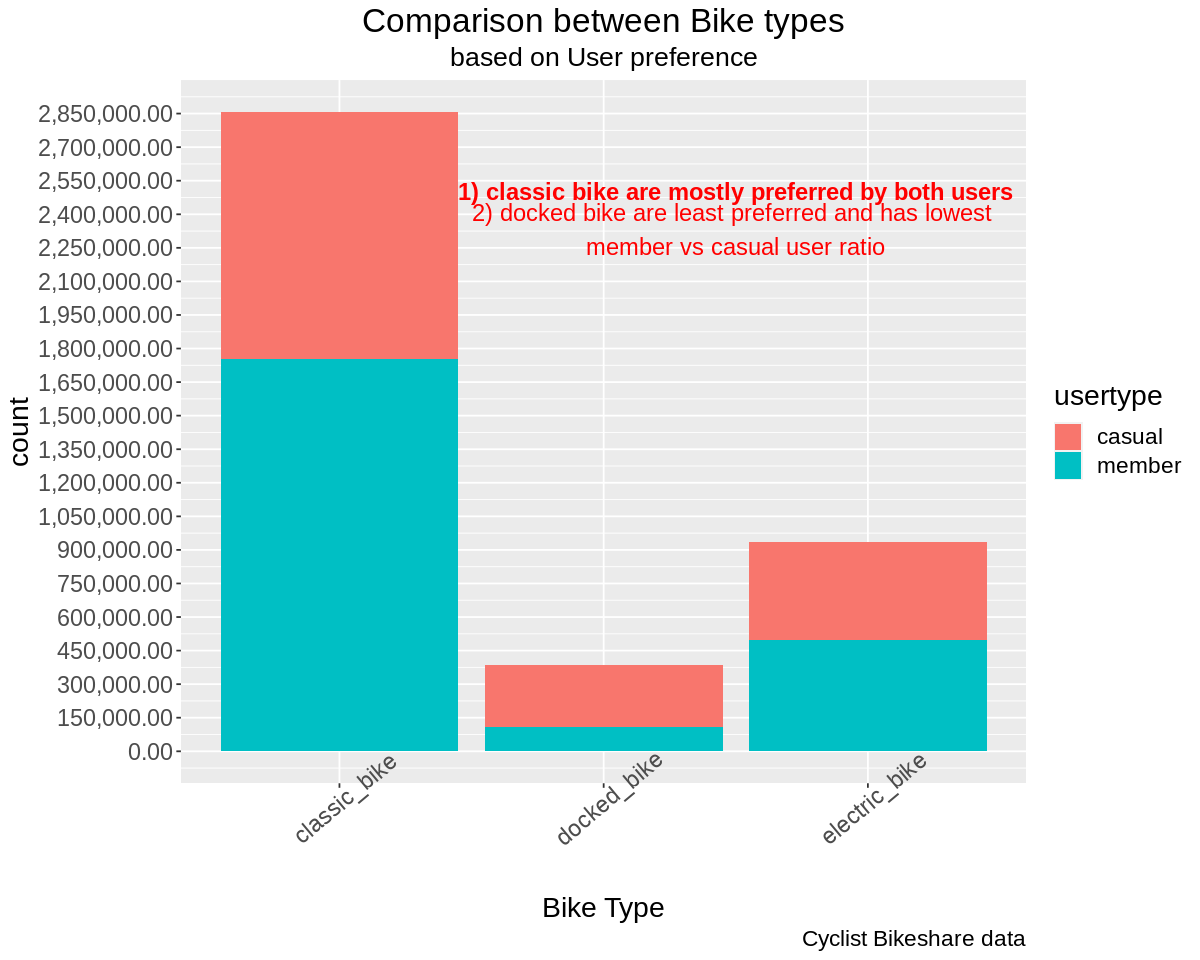

In [46]:
ggplot(df, aes(bike_type, fill = usertype)) +geom_bar()+
scale_y_continuous(labels = comma, breaks = seq(0,3000000, by = 150000)) + 
labs(title="Comparison between Bike types", subtitle="based on User preference", caption = "Cyclist Bikeshare data", x="Bike Type",  y="count")+
theme_grey() + annotate("text", x=2.5,y=2500000, label= "1) classic bike are mostly preferred by both users", color="red", fontface="bold", hjust=0.5, size=5)+ 
annotate("text", x=2.5,y=2333333, label= "2) docked bike are least preferred and has lowest \nmember vs casual user ratio", color="red", hjust=0.5, size=5)+
theme(plot.title = element_text(size=20, hjust=0.5), plot.subtitle =element_text(size=16, hjust=0.5),
axis.text = element_text(size = 14), text = element_text(size = 17)) + theme(axis.text.x = element_text(angle = 40))

options(repr.plot.width=12, repr.plot.height=10)

In [47]:
bike_casual <- df_final %>%
  filter(usertype=="casual") %>%
  group_by(bike_type) %>%
  summarize(counts = n()) %>%
  mutate(percentage = round(counts *100/ sum(counts))) %>%
  arrange(desc(percentage))

bike_casual

bike_type,counts,percentage
<chr>,<int>,<dbl>
classic_bike,1102736,61
electric_bike,436245,24
docked_bike,277189,15


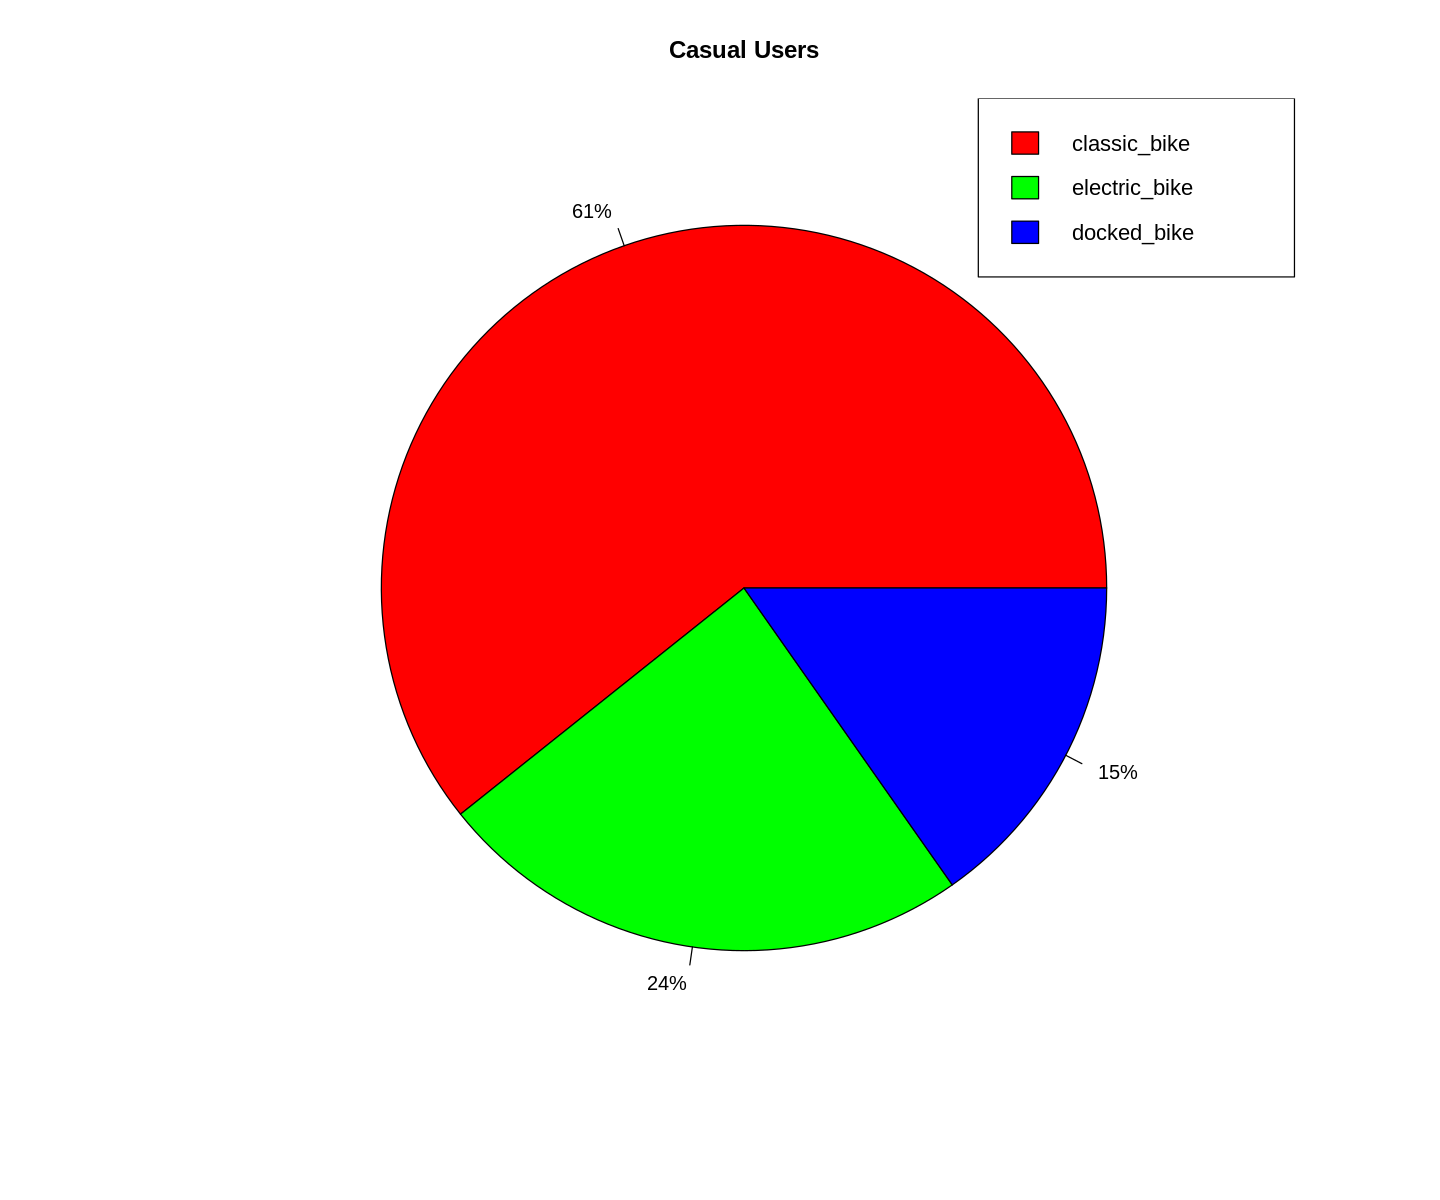

In [48]:
lbls <- paste(bike_casual$percentage, "%", sep="")
pie(bike_casual$counts, labels= lbls, col= rainbow(length(lbls)), main ="Casual Users")
legend("topright", bike_casual$bike_type, cex=1.1, fill= rainbow(length(bike_casual$bike_type)))

options(repr.plot.width=8, repr.plot.height=8)

In [49]:
bike_member <- df_final %>%
  filter(usertype=="member") %>%
  group_by(bike_type) %>%
  summarize(counts = n()) %>%
  ungroup() %>%
  mutate(percentage = counts/ sum(counts)) %>%
  arrange(desc(percentage)) %>%
  mutate(percentage = formattable::percent(percentage, digits=2)) 

bike_member

bike_type,counts,percentage
<chr>,<int>,<formttbl>
classic_bike,1754211,74.41%
electric_bike,496956,21.08%
docked_bike,106380,4.51%


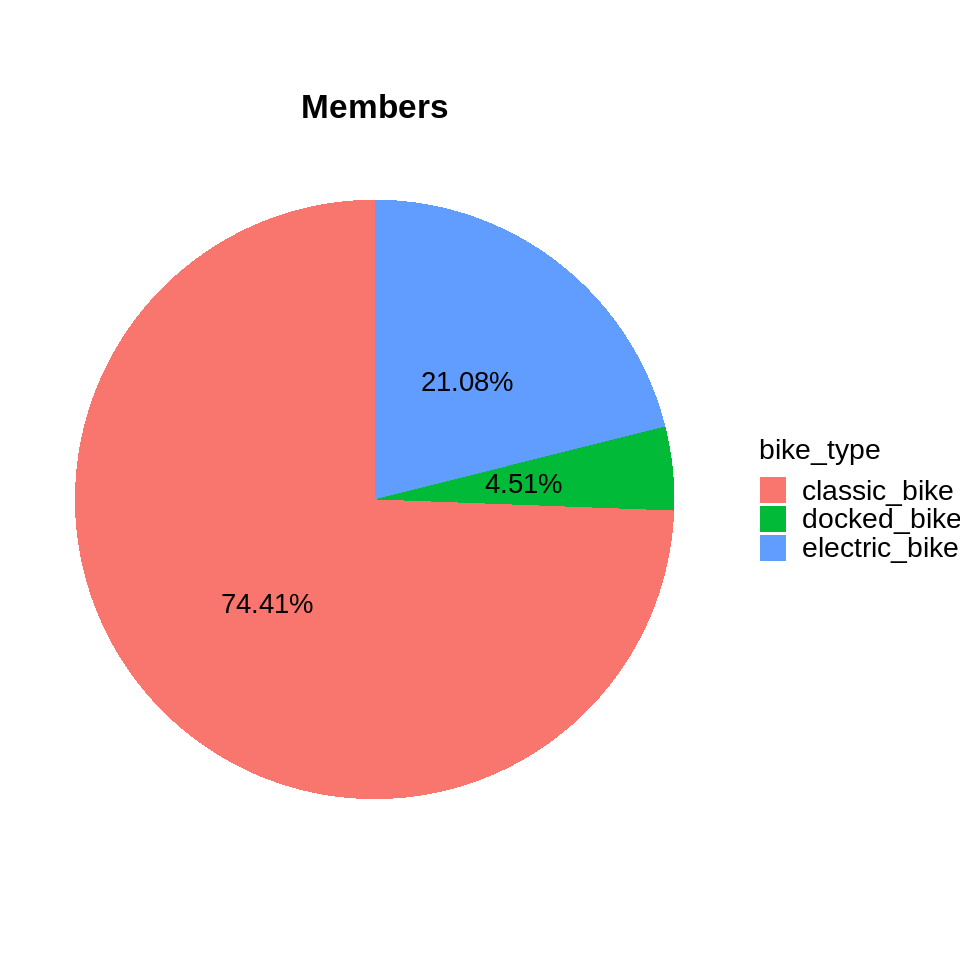

In [50]:
ggplot(bike_member, aes(x=factor(1), y=percentage, fill= bike_type))+
  geom_col() +  theme_void() +
  geom_text(aes(label = percentage), position = position_stack(vjust = 0.5), size=5.8) +
  coord_polar("y") + labs(title="Members") + 
  theme(plot.title = element_text(face="bold", hjust=0.5, size=20), legend.title = element_text(size=17), legend.text = element_text(size=17))
  
options(repr.plot.width=10, repr.plot.height=10)

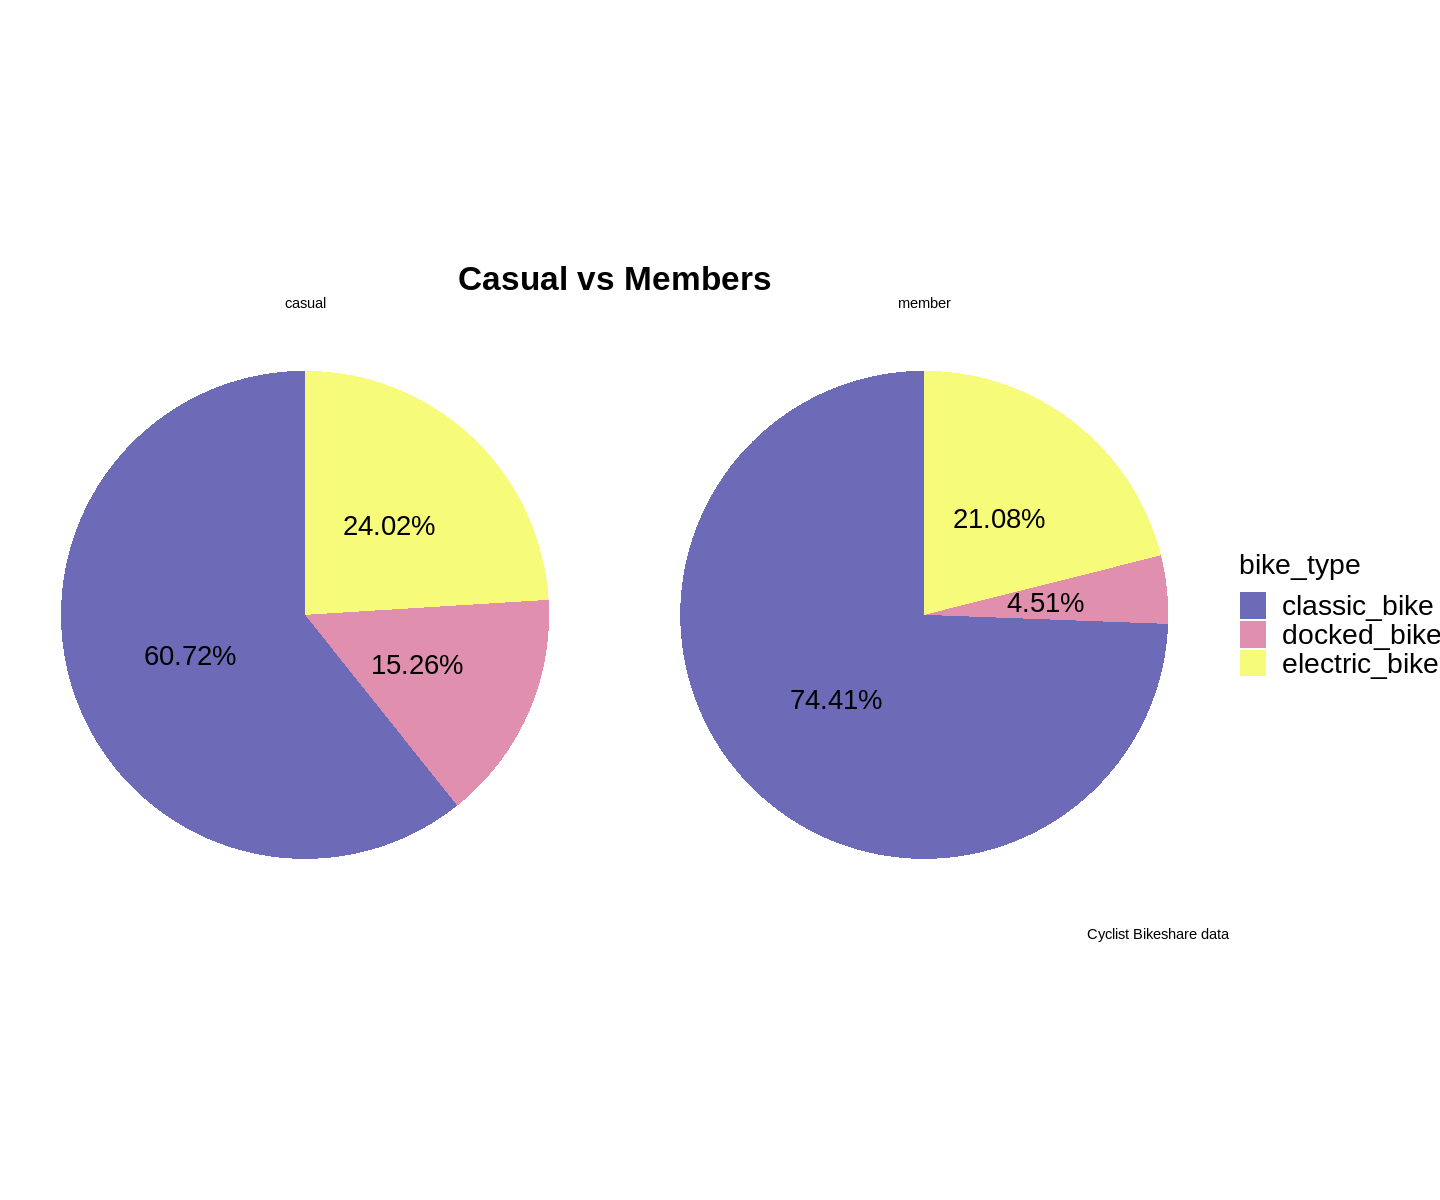

In [53]:
bike_user <- df_final %>%
  count( usertype, bike_type) %>%
  rename(counts = n) %>%
  group_by(usertype) %>%
  mutate(percentage = counts/ sum(counts)) %>%
  mutate(percentage = formattable::percent(percentage, digits=2)) 

ggplot(bike_user, aes(x=factor(1), y=percentage, fill= bike_type))+
  geom_col() +  theme_void() +
  geom_text(aes(label = percentage), position = position_stack(vjust = 0.5), size=5.8) +
  coord_polar("y") + labs(title="Casual vs Members", caption = "Cyclist Bikeshare data") + 
  theme(plot.title = element_text(face="bold", hjust=0.5, size=20),
  legend.title = element_text(size=17), legend.text = element_text(size=17))+
  scale_fill_viridis_d(alpha=0.6 ,option = "C") + facet_wrap(~usertype) 
  
options(repr.plot.width=10, repr.plot.height=8)

**2) Station Usage**

In [54]:
head(count(df_final, start_station_name, usertype, sort = TRUE), 11)

,start_station_name,usertype,n
,<chr>,<chr>,<int>
1,Streeter Dr & Grand Ave,casual,52249
2,Millennium Park,casual,26059
3,Michigan Ave & Oak St,casual,23404
4,Clark St & Elm St,member,22738
5,Wells St & Concord Ln,member,21418
6,Kingsbury St & Kinzie St,member,20676
7,Shedd Aquarium,casual,19038
8,Wells St & Elm St,member,18887
9,Wells St & Concord Ln,casual,17918


In [55]:
head(count(df_final, end_station_name, usertype, sort = TRUE), 10)

,end_station_name,usertype,n
,<chr>,<chr>,<int>
1,Streeter Dr & Grand Ave,casual,54956
2,Millennium Park,casual,27524
3,Michigan Ave & Oak St,casual,25023
4,Clark St & Elm St,member,22978
5,Wells St & Concord Ln,member,22110
6,Kingsbury St & Kinzie St,member,21061
7,Theater on the Lake,casual,19634
8,Wells St & Elm St,member,19528
9,Dearborn St & Erie St,member,18377


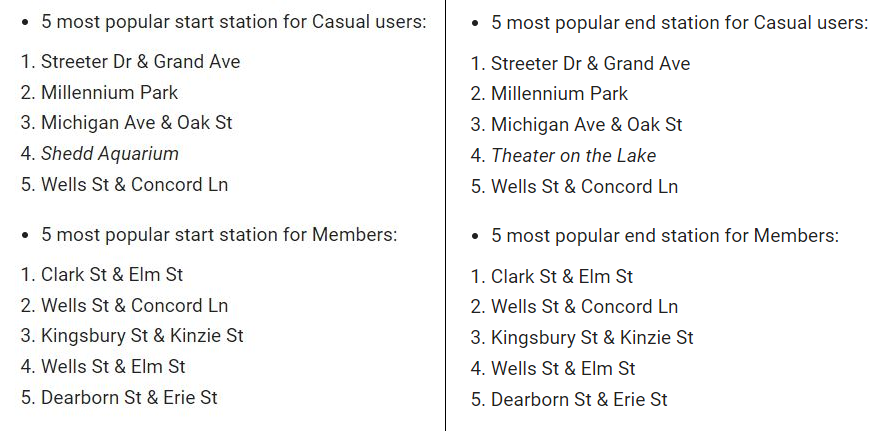

In [ ]:
write.csv(sub1, file="df_mem.csv", row.names = FALSE)
write.csv(sub2, file="df_cas.csv", row.names = FALSE)

# From Tableau

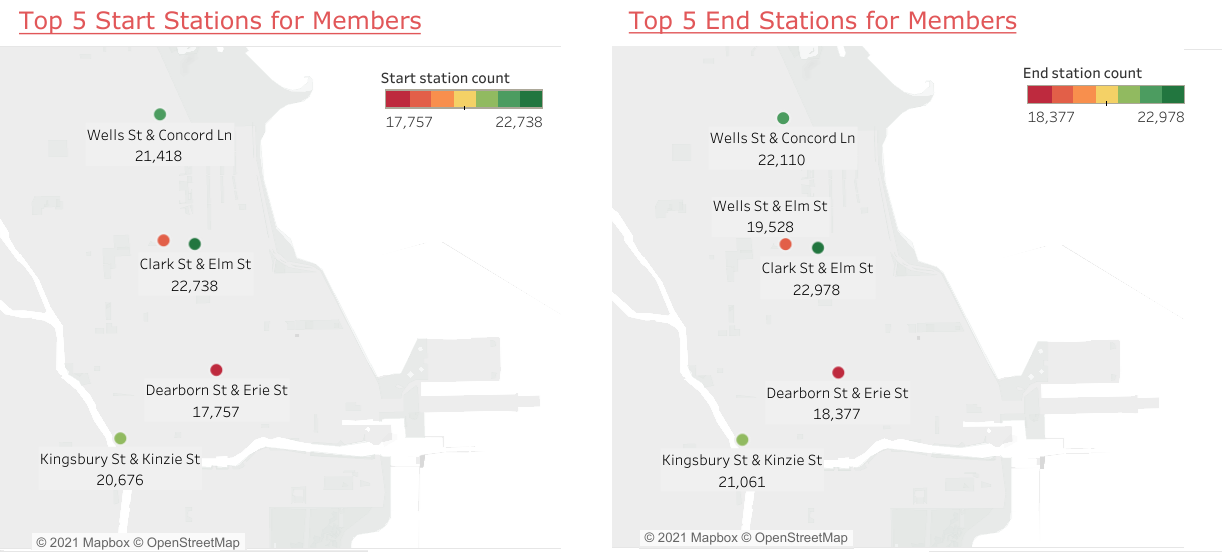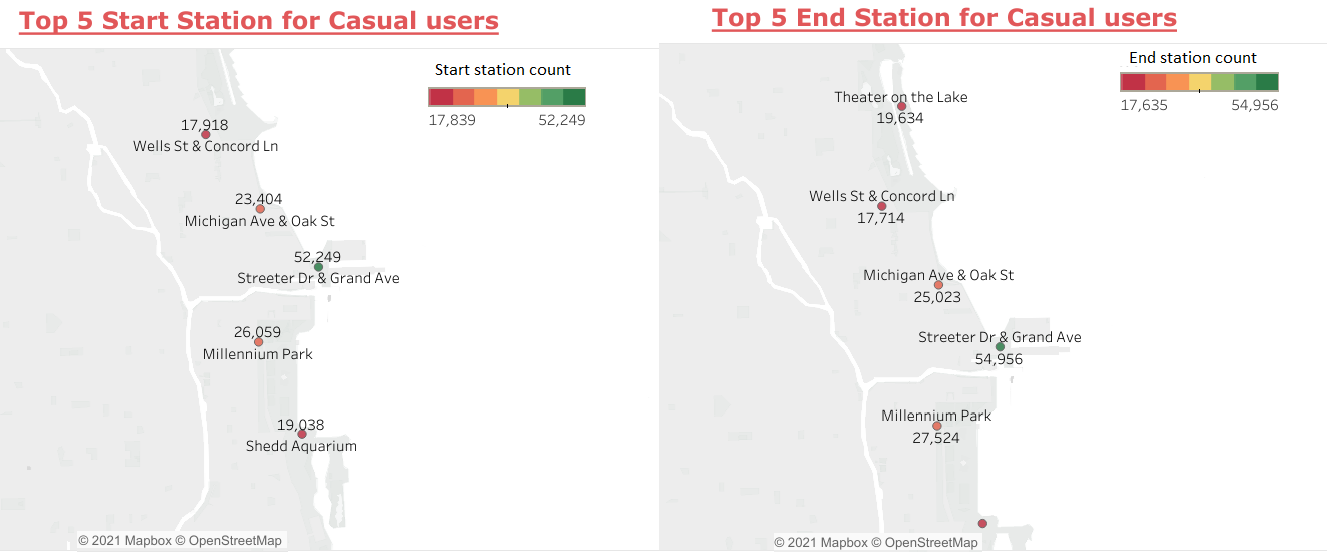

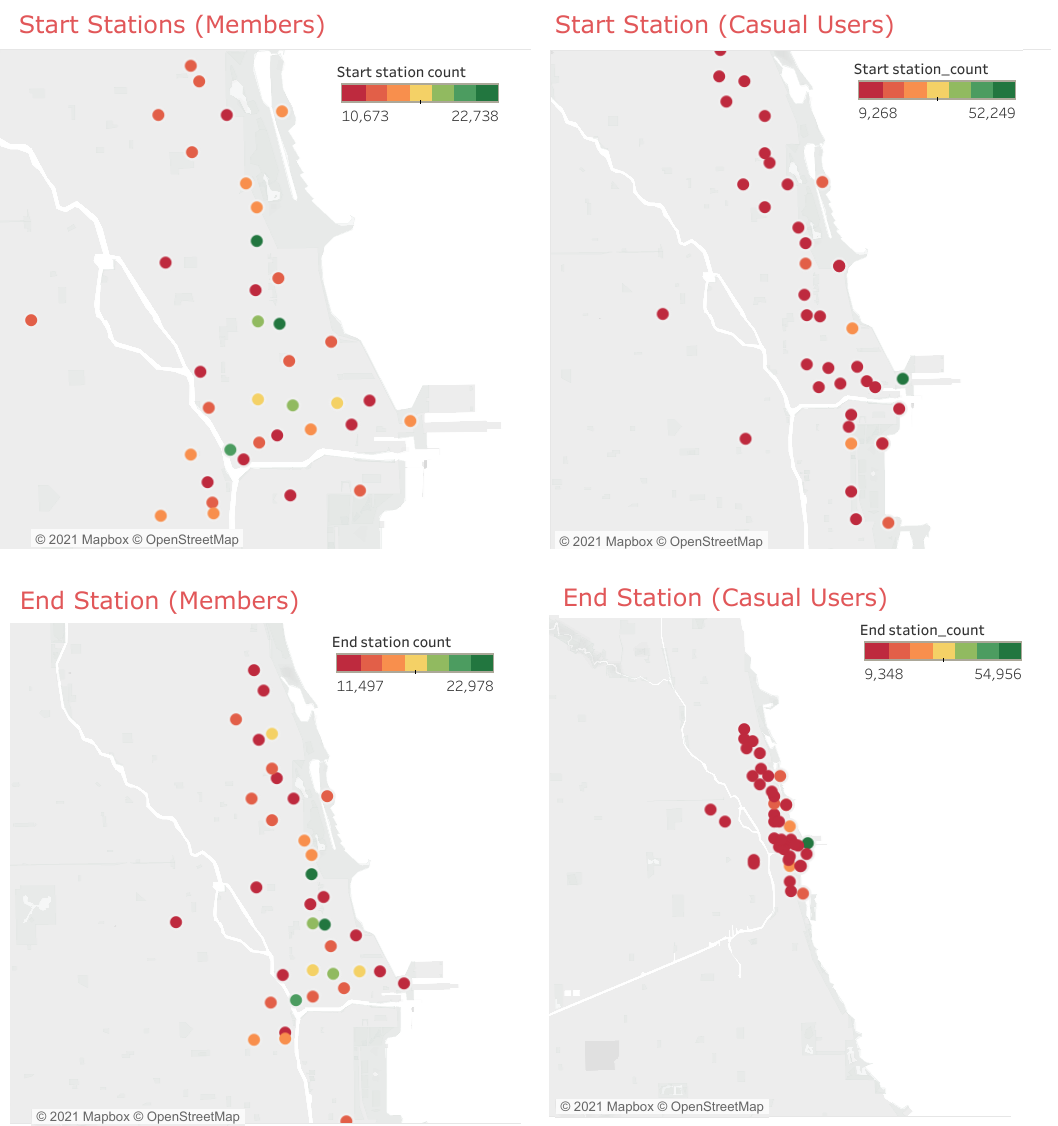

*   A huge chunk of stations used by Casual riders is located near the coastal line
*   stations used by Members is spread out throughout the area

In [56]:
#count of user type in start station 
df_start <- df_final %>% 
  group_by(start_station_name) %>% 
  count(usertype) %>% 
  arrange(start_station_name)

#count of user type in end station 
df_end <- df_final %>% 
  group_by(end_station_name) %>% 
  count(usertype) %>% 
  arrange(end_station_name)

#combined station usage(start station + end station) data
#usertype of start station and end station is same
station_use <- merge(x = df_start, y=df_end, by.x = "start_station_name", by.y = "end_station_name", all = TRUE) %>% 
  filter(usertype.x == usertype.y) %>% 
  mutate(station_usage = n.x + n.y) %>%
  arrange(-station_usage)

head(station_use, 10)

,start_station_name,usertype.x,n.x,usertype.y,n.y,station_usage
,<chr>,<chr>,<int>,<chr>,<int>,<int>
1,Streeter Dr & Grand Ave,casual,52249,casual,54956,107205
2,Millennium Park,casual,26059,casual,27524,53583
3,Michigan Ave & Oak St,casual,23404,casual,25023,48427
4,Clark St & Elm St,member,22738,member,22978,45716
5,Wells St & Concord Ln,member,21418,member,22110,43528
6,Kingsbury St & Kinzie St,member,20676,member,21061,41737
7,Wells St & Elm St,member,18887,member,19528,38415
8,Theater on the Lake,casual,17839,casual,19634,37473
9,Shedd Aquarium,casual,19038,casual,17635,36673


**3) Trip duration and Trip distance**

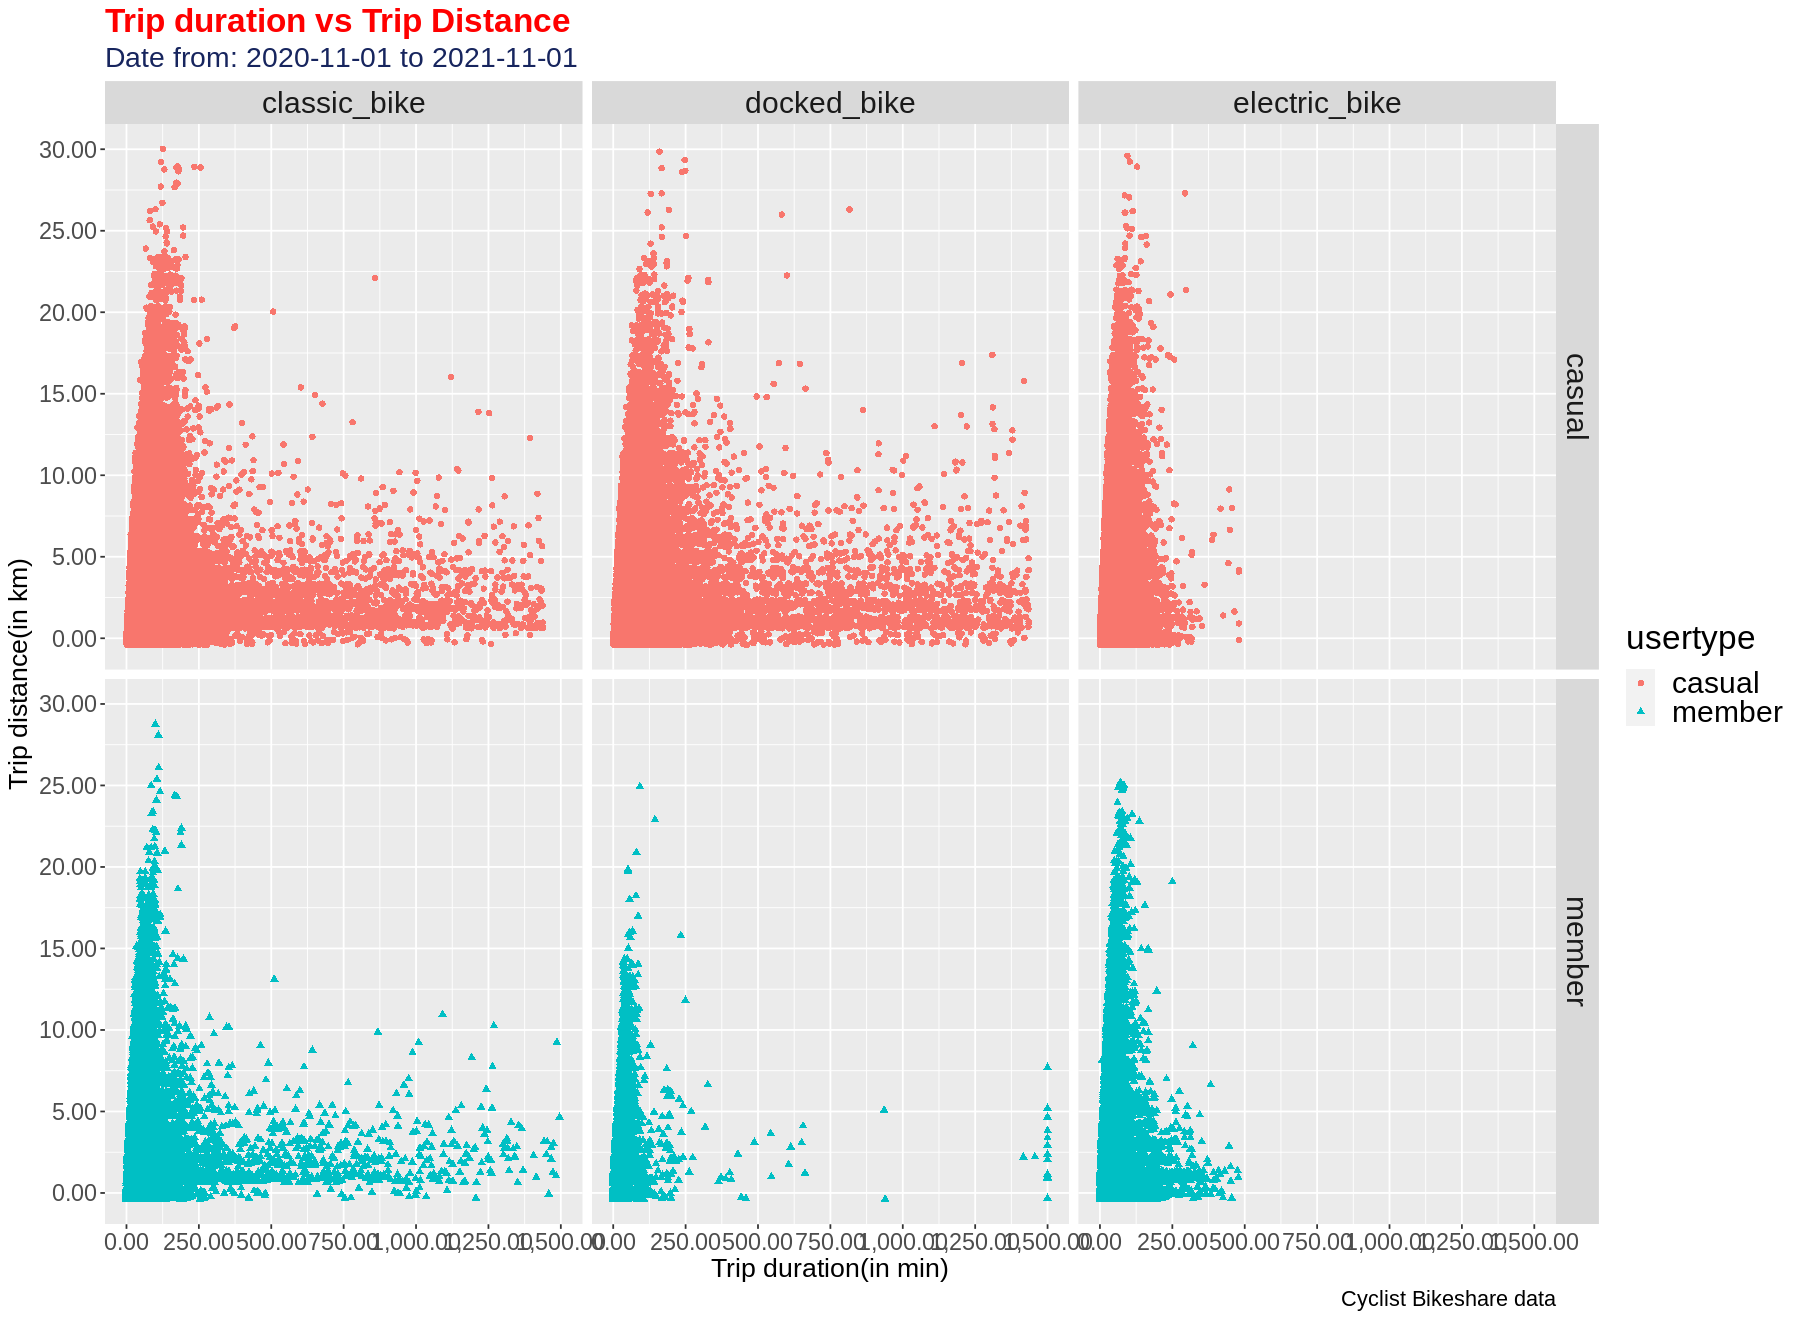

In [61]:
mindate <- min(as.Date(df_final$started_at))
maxdate <- max(as.Date(df_final$ended_at))

ggplot(filter(df_final, dist_km<30), aes(x = trip_duration_min, y = round(dist_km), color = usertype, shape = usertype)) +
geom_point(position = position_jitter()) + facet_grid(usertype~bike_type) +
 labs(x = "Trip duration(in min)", y = "Trip distance(in km)",
 title = "Trip duration vs Trip Distance", subtitle = paste0("Date from: ", mindate, " to ", maxdate), caption = "Cyclist Bikeshare data") +
scale_y_continuous(labels = comma, breaks = seq(0, 30, by = 5)) +
scale_x_continuous(labels = comma, breaks = seq(0, 1600, by = 250)) +
 theme(plot.title = element_text(color = "red", size = 20, face = "bold", lineheight = 0.8),
  plot.subtitle = element_text(size=17, color = "#17255e"), plot.caption = element_text(size=13), strip.text=element_text(size=18), 
  axis.title = element_text(size = 16), axis.text = element_text(size = 14),
  legend.title = element_text(size=20), legend.text = element_text(size=18))

options(repr.plot.width=20, repr.plot.height=15)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



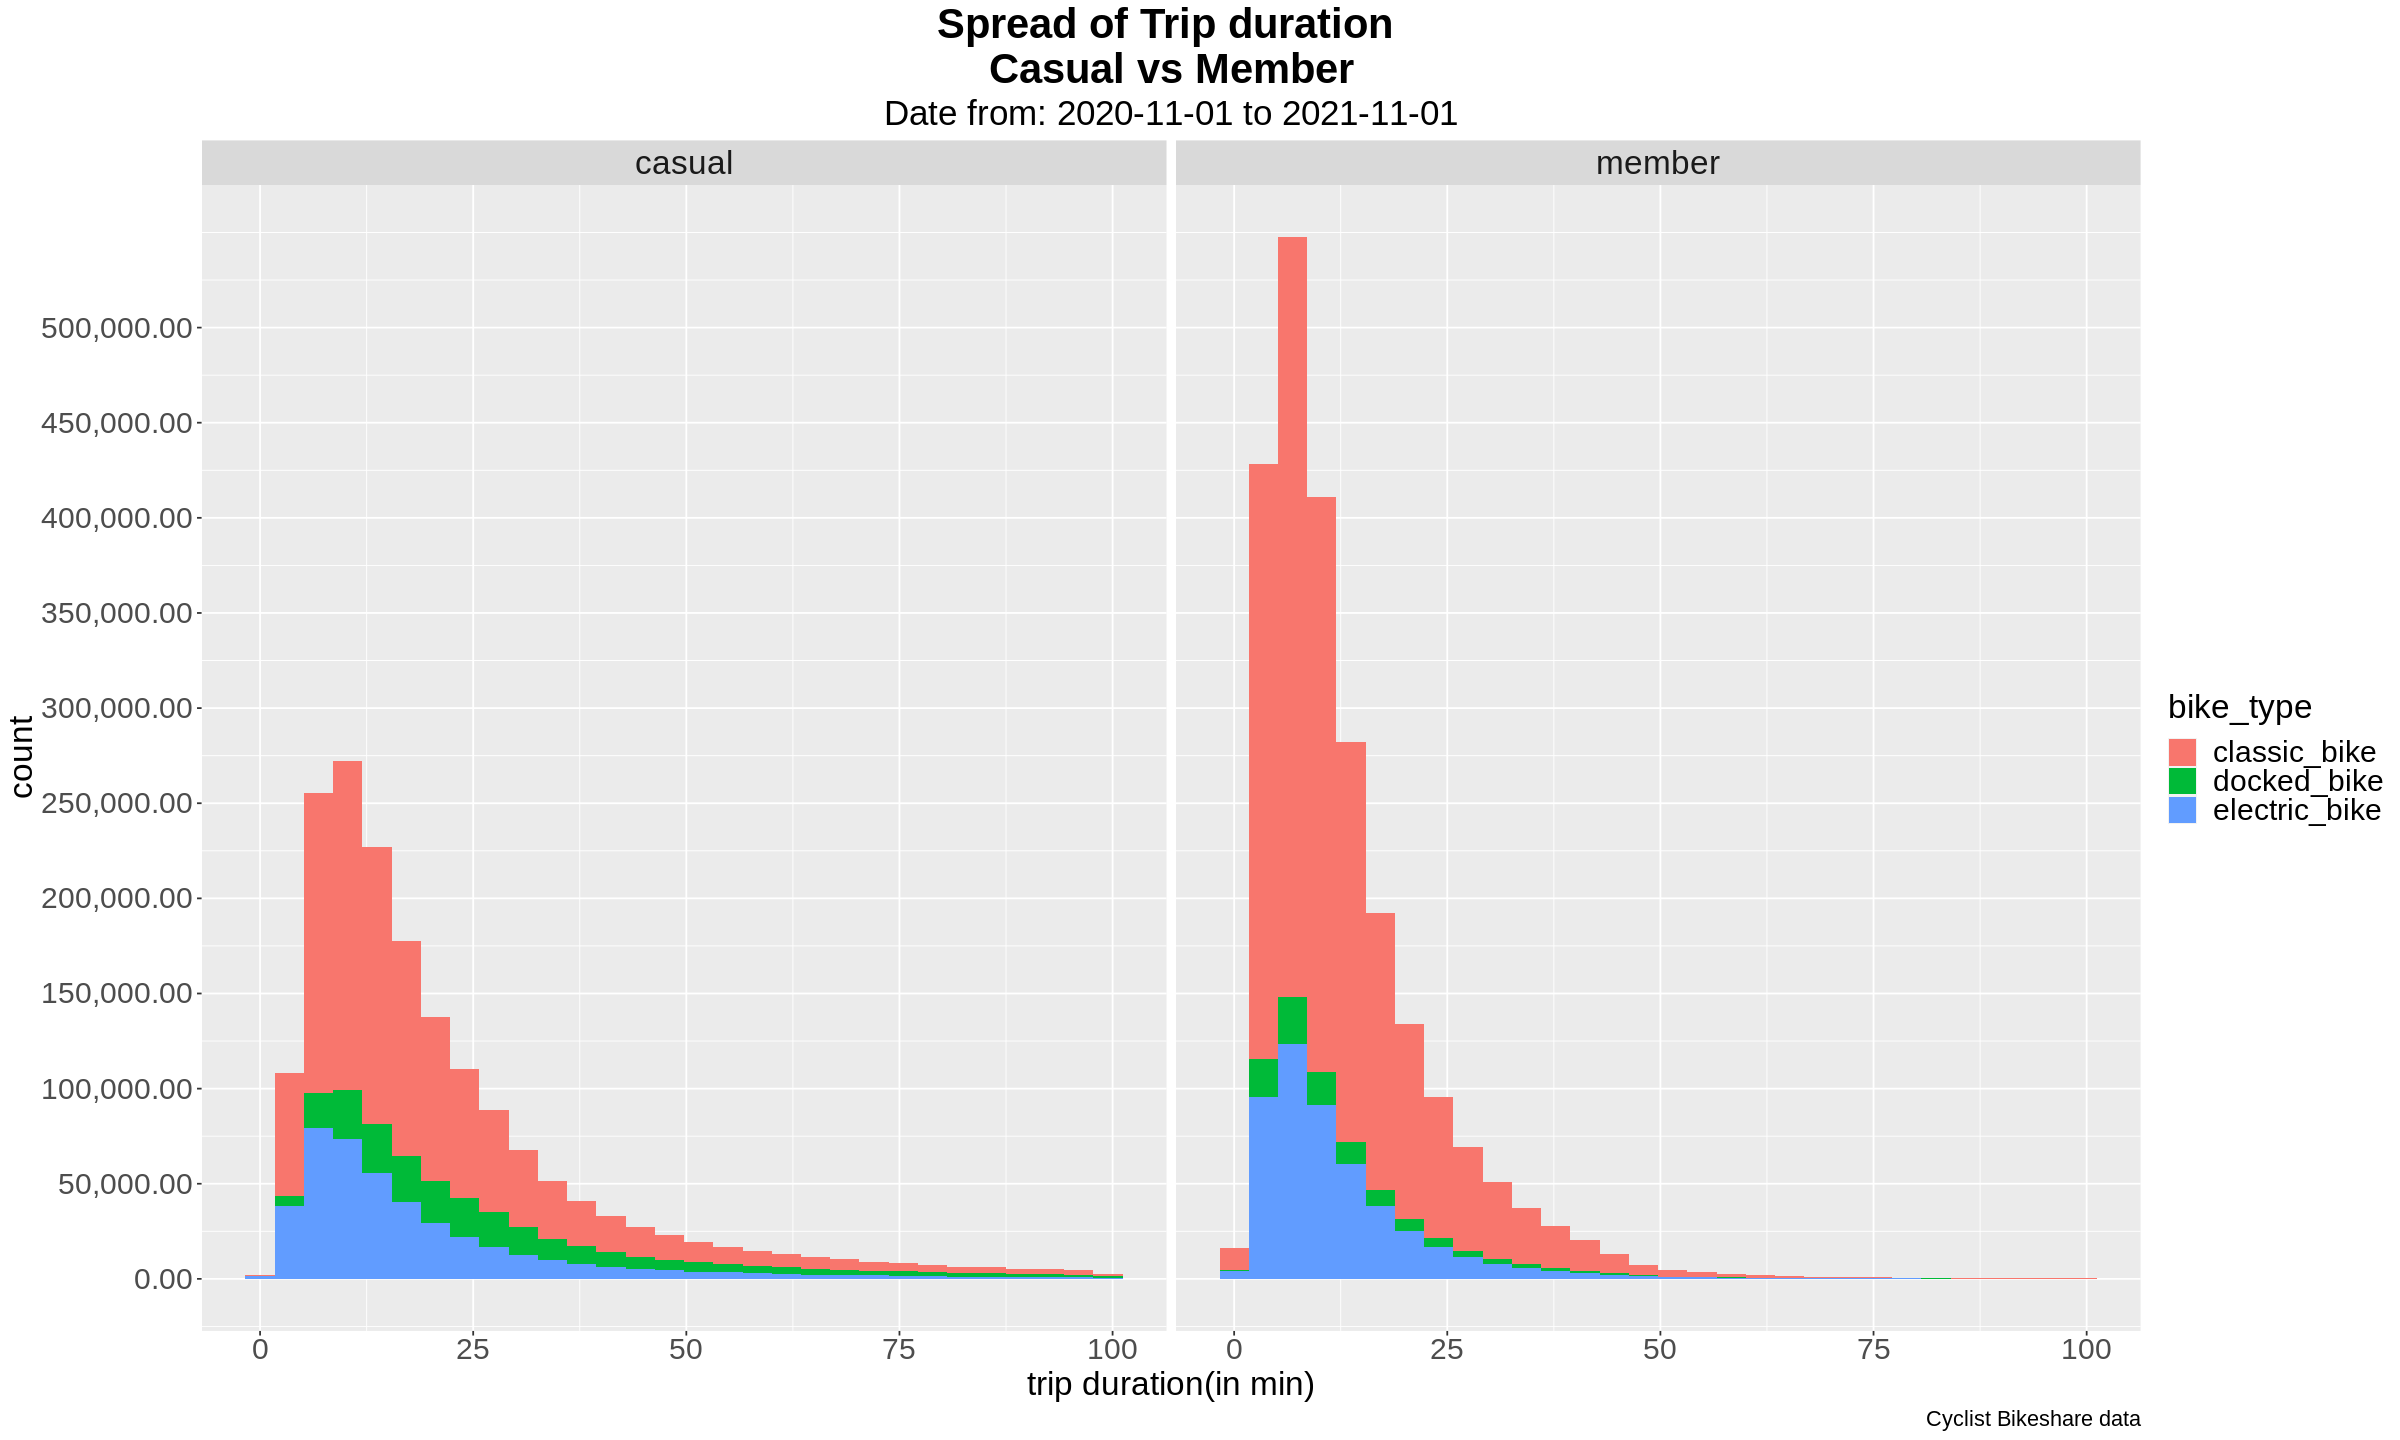

In [63]:
ggplot(filter(df_final, trip_duration_min <100), aes(x=trip_duration_min, fill=bike_type)) + geom_histogram() + facet_wrap(~usertype) +
labs(title = "Spread of Trip duration \nCasual vs Member", subtitle = paste0("Date from: ", mindate, " to ", maxdate), x = "trip duration(in min)",
caption = "Cyclist Bikeshare data")+
theme(plot.title = element_text(face="bold", hjust=0.5, size=25), plot.subtitle = element_text(size=21, hjust=0.5),
  legend.title = element_text(size=20), legend.text = element_text(size=18), plot.caption = element_text(size=13), 
  axis.title=element_text(size=20), axis.text=element_text(size=18),
  strip.text.x=element_text(size=20))+
scale_y_continuous(labels = comma, breaks = seq(0,500000, by = 50000))

options(repr.plot.width = 10, repr.plot.height = 8)

In [64]:
df_final %>%
  select(days_traveled, trip_duration_min, dist_km) %>%
  summary()

 days_traveled       trip_duration_min      dist_km      
 Min.   :0.0003588   Min.   :   0.5167   Min.   : 0.010  
 1st Qu.:0.0050000   1st Qu.:   7.2000   1st Qu.: 1.054  
 Median :0.0085301   Median :  12.2833   Median : 1.761  
 Mean   :0.0132106   Mean   :  19.0233   Mean   : 2.315  
 3rd Qu.:0.0148843   3rd Qu.:  21.4333   3rd Qu.: 2.977  
 Max.   :1.0416204   Max.   :1499.9333   Max.   :48.425  

In [65]:
# summary for casual riders only
df_final %>%
  filter(usertype=="casual") %>%
  select(days_traveled, trip_duration_min, dist_km) %>%
  summary()

 days_traveled       trip_duration_min      dist_km      
 Min.   :0.0003588   Min.   :   0.5167   Min.   : 0.010  
 1st Qu.:0.0067014   1st Qu.:   9.6500   1st Qu.: 1.191  
 Median :0.0112500   Median :  16.2000   Median : 1.905  
 Mean   :0.0183015   Mean   :  26.3542   Mean   : 2.451  
 3rd Qu.:0.0197569   3rd Qu.:  28.4500   3rd Qu.: 3.124  
 Max.   :0.9995602   Max.   :1439.3667   Max.   :33.838  

In [66]:
# summary for members only
df_final %>%
  filter(usertype=="member") %>%
  select(days_traveled, trip_duration_min, dist_km) %>%
  summary()

 days_traveled       trip_duration_min      dist_km       
 Min.   :0.0003588   Min.   :   0.5167   Min.   : 0.0100  
 1st Qu.:0.0041667   1st Qu.:   6.0000   1st Qu.: 0.9923  
 Median :0.0069444   Median :  10.0000   Median : 1.6503  
 Mean   :0.0092887   Mean   :  13.3758   Mean   : 2.2099  
 3rd Qu.:0.0116435   3rd Qu.:  16.7667   3rd Qu.: 2.8617  
 Max.   :1.0416204   Max.   :1499.9333   Max.   :48.4250  

In [67]:
stat <- df_final %>%
  group_by(usertype) %>%
  summarize(avg_trip_duration = mean(trip_duration_min),
            total_trip_min = sum(trip_duration_min),
            avg_trip_dist = mean(dist_km),
            total_trip_dist = sum(dist_km),
            dock_trip_sum = sum(bike_type == "docked_bike"),
            elec_trip_sum = sum(bike_type == "electric_bike"),
            classic_trip_sum = sum(bike_type == "classic_bike"),
            total_ride = dock_trip_sum + elec_trip_sum + classic_trip_sum,
            dock_perc = round(dock_trip_sum / total_ride *100),
            elec_perc = round(elec_trip_sum / total_ride *100),
            classic_perc = round(classic_trip_sum / total_ride *100))

stat

usertype,avg_trip_duration,total_trip_min,avg_trip_dist,total_trip_dist,dock_trip_sum,elec_trip_sum,classic_trip_sum,total_ride,dock_perc,elec_perc,classic_perc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
casual,26.35423,47863760,2.450731,4450943,277189,436245,1102736,1816170,15,24,61
member,13.37579,31534045,2.209942,5210041,106380,496956,1754211,2357547,5,21,74


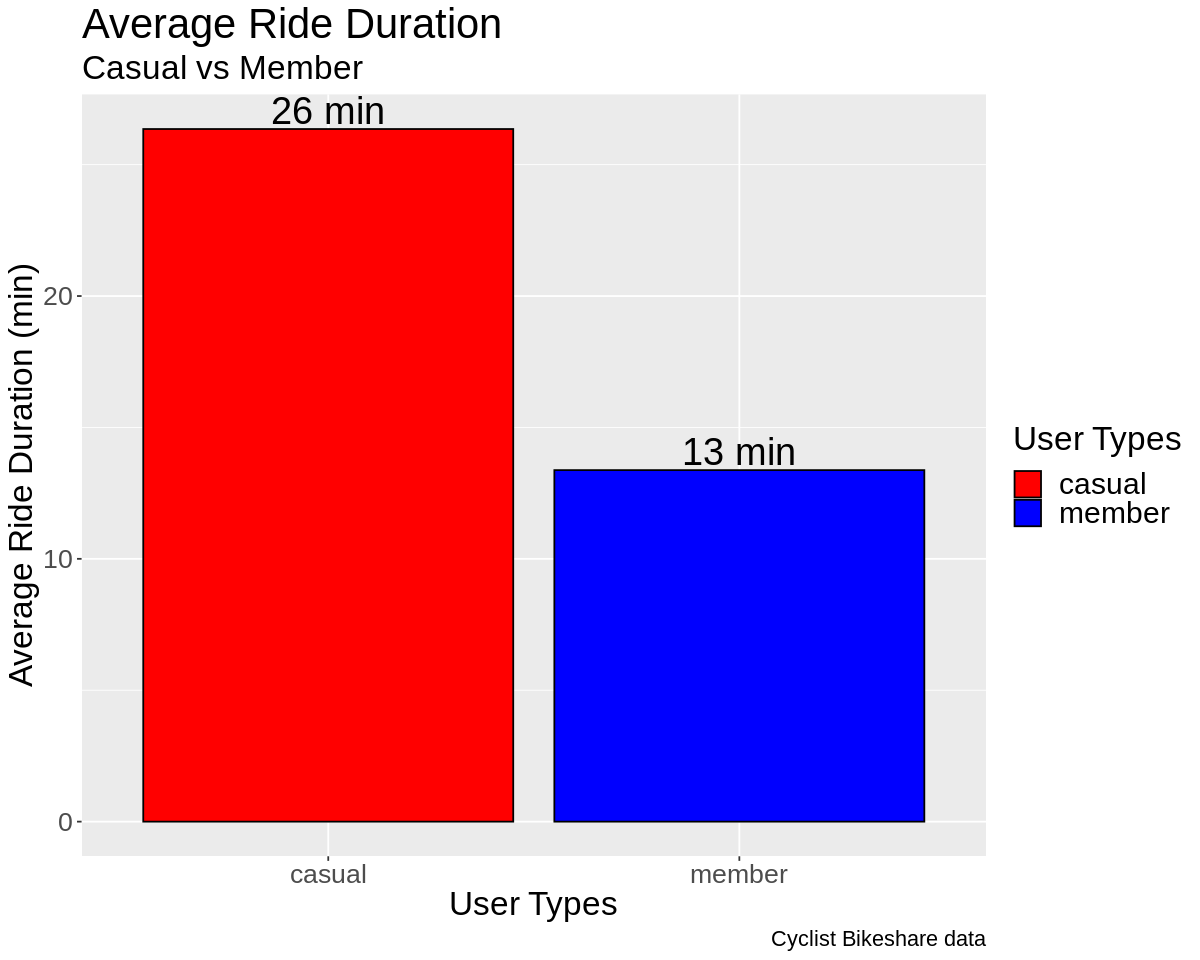

In [68]:
ggplot(data=stat, mapping=aes(x=usertype, y=avg_trip_duration, fill=usertype))+
  geom_col(color="black")+
  scale_fill_manual(values = c("casual"="red", "member" = "blue"))+
  geom_text(aes(label = paste0(round(avg_trip_duration)," min")), vjust = -0.2, size=8)+
  labs(title = "Average Ride Duration", subtitle = "Casual vs Member", fill="User Types", x="User Types", y="Average Ride Duration (min)",
   caption = "Cyclist Bikeshare data")+
  theme(legend.title = element_text(size=20), legend.text = element_text(size=18), plot.caption = element_text(size=13),
  plot.title=element_text(size=25), plot.subtitle=element_text(size=20), axis.title=element_text(size=20), axis.text=element_text(size=16))

options(repr.plot.width=12, repr.plot.height=10)

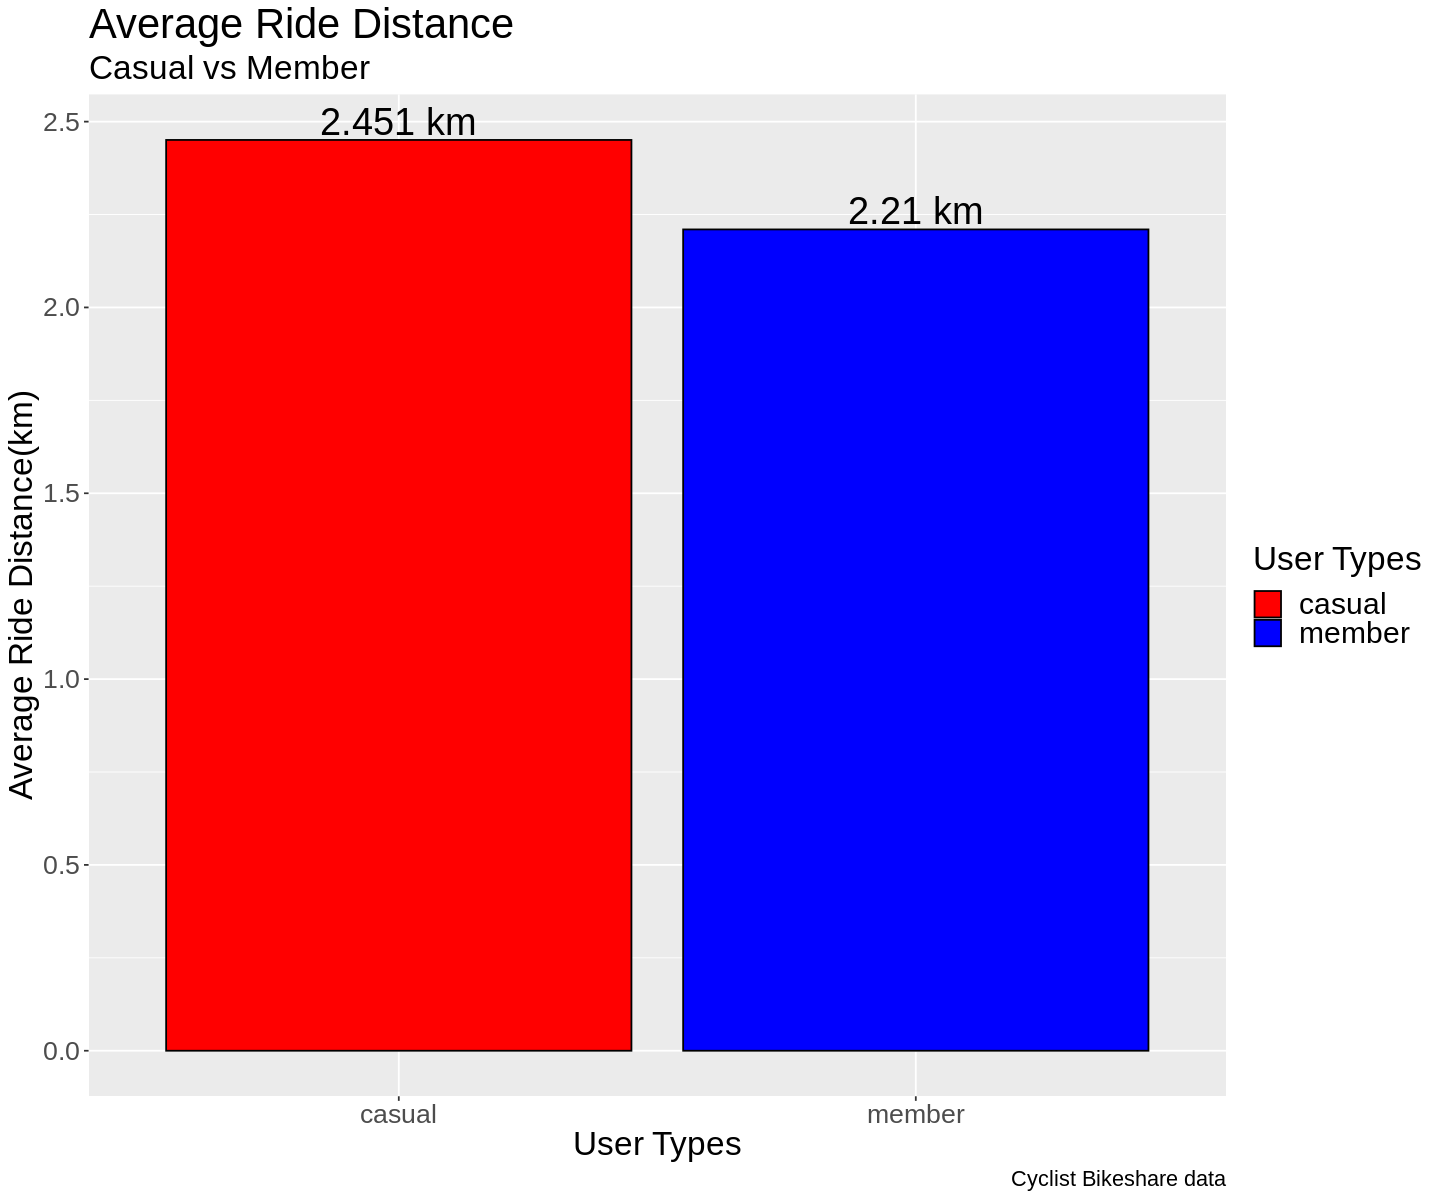

In [69]:
ggplot(data=stat, mapping=aes(x=usertype, y=avg_trip_dist, fill=usertype))+
  geom_col(color="black")+
  scale_fill_manual(values = c("casual"="red", "member" = "blue"))+
  geom_text(aes(label = paste0(round(avg_trip_dist, 3)," km")), vjust = -0.2, size=8)+
  labs(title = "Average Ride Distance", subtitle = "Casual vs Member", fill="User Types", x="User Types", y="Average Ride Distance(km)",
   caption = "Cyclist Bikeshare data")+
  theme(legend.title = element_text(size=20), legend.text = element_text(size=18), plot.caption = element_text(size=13),
  plot.title=element_text(size=25), plot.subtitle=element_text(size=20), axis.title=element_text(size=20), axis.text=element_text(size=16))

options(repr.plot.width=12, repr.plot.height=10)

Here, the measurement of distance calculated is Shortest angular distance between two coordinates (assuming a spherical earth, ignoring ellipsoidal effects). The actual distance traveled may be different from the calculated value(since in real world, start point and end point may be very near but the user has to take a long road to reach the end point).

**4) Ride Count**

a) By Hour

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


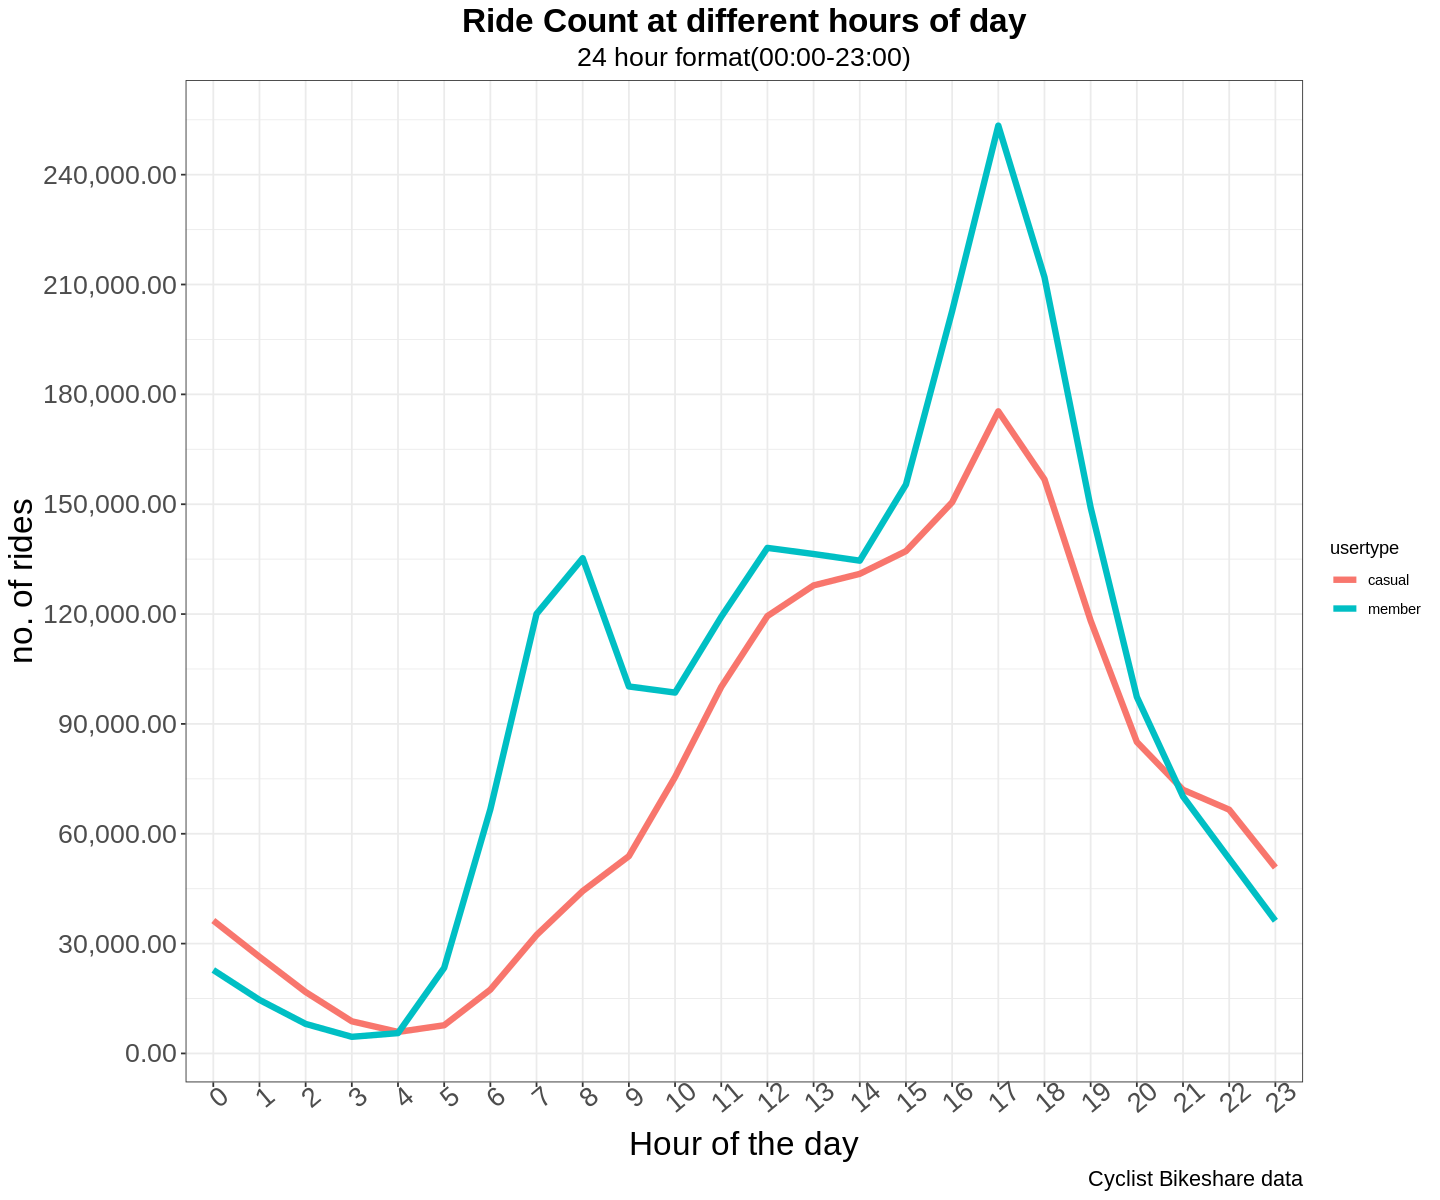

In [70]:
df_hour <- df_final %>%
  mutate(day_hour = hour(started_at)) %>%
  group_by(day_hour) %>%
  count(usertype)

ggplot(df_hour, aes(x=day_hour, y=n, fill=usertype)) + geom_line(aes(color=usertype), size=1.8)+ theme_bw() +
labs(title="Ride Count at different hours of day", subtitle="24 hour format(00:00-23:00)", x="Hour of the day", y="no. of rides",
   caption = "Cyclist Bikeshare data") +
theme(plot.title = element_text(face="bold", hjust=0.5, size=20), plot.subtitle = element_text(size=16, hjust=0.5), 
axis.title=element_text(size=20), axis.text=element_text(size=16),
axis.text.x = element_text(angle = 40), strip.text.x=element_text(size=20), plot.caption = element_text(size=13)) +
scale_x_discrete(limits = unique(df_hour$day_hour), labels=unique(df_hour$day_hour)) +
scale_y_continuous(labels = comma, breaks = seq(0,270000, by = 30000))

options(repr.plot.width = 17, repr.plot.height = 12)

In [71]:
df_hour1 <- df_final %>%
  mutate(day_hour = hour(started_at)) %>%
  mutate(day_hour = format(started_at, "%I %p"))

df_hour1$day_hour = ordered(df_hour1$day_hour, levels = c("12 AM", "01 AM", "02 AM", "03 AM", "04 AM", "05 AM", "06 AM", "07 AM", "08 AM", "09 AM","10 AM",
"11 AM", "12 PM", "01 PM", "02 PM", "03 PM", "04 PM", "05 PM", "06 PM", "07 PM", "08 PM", "09 PM","10 PM", "11 PM"))

df_hour1 <- df_hour1 %>%
  group_by(day_hour) %>%
  count(usertype)

df_hour1

day_hour,usertype,n
<ord>,<chr>,<int>
12 AM,casual,36297
12 AM,member,22789
01 AM,casual,26394
01 AM,member,14625
02 AM,casual,16769
02 AM,member,8064
03 AM,casual,8776
03 AM,member,4542
04 AM,casual,5878


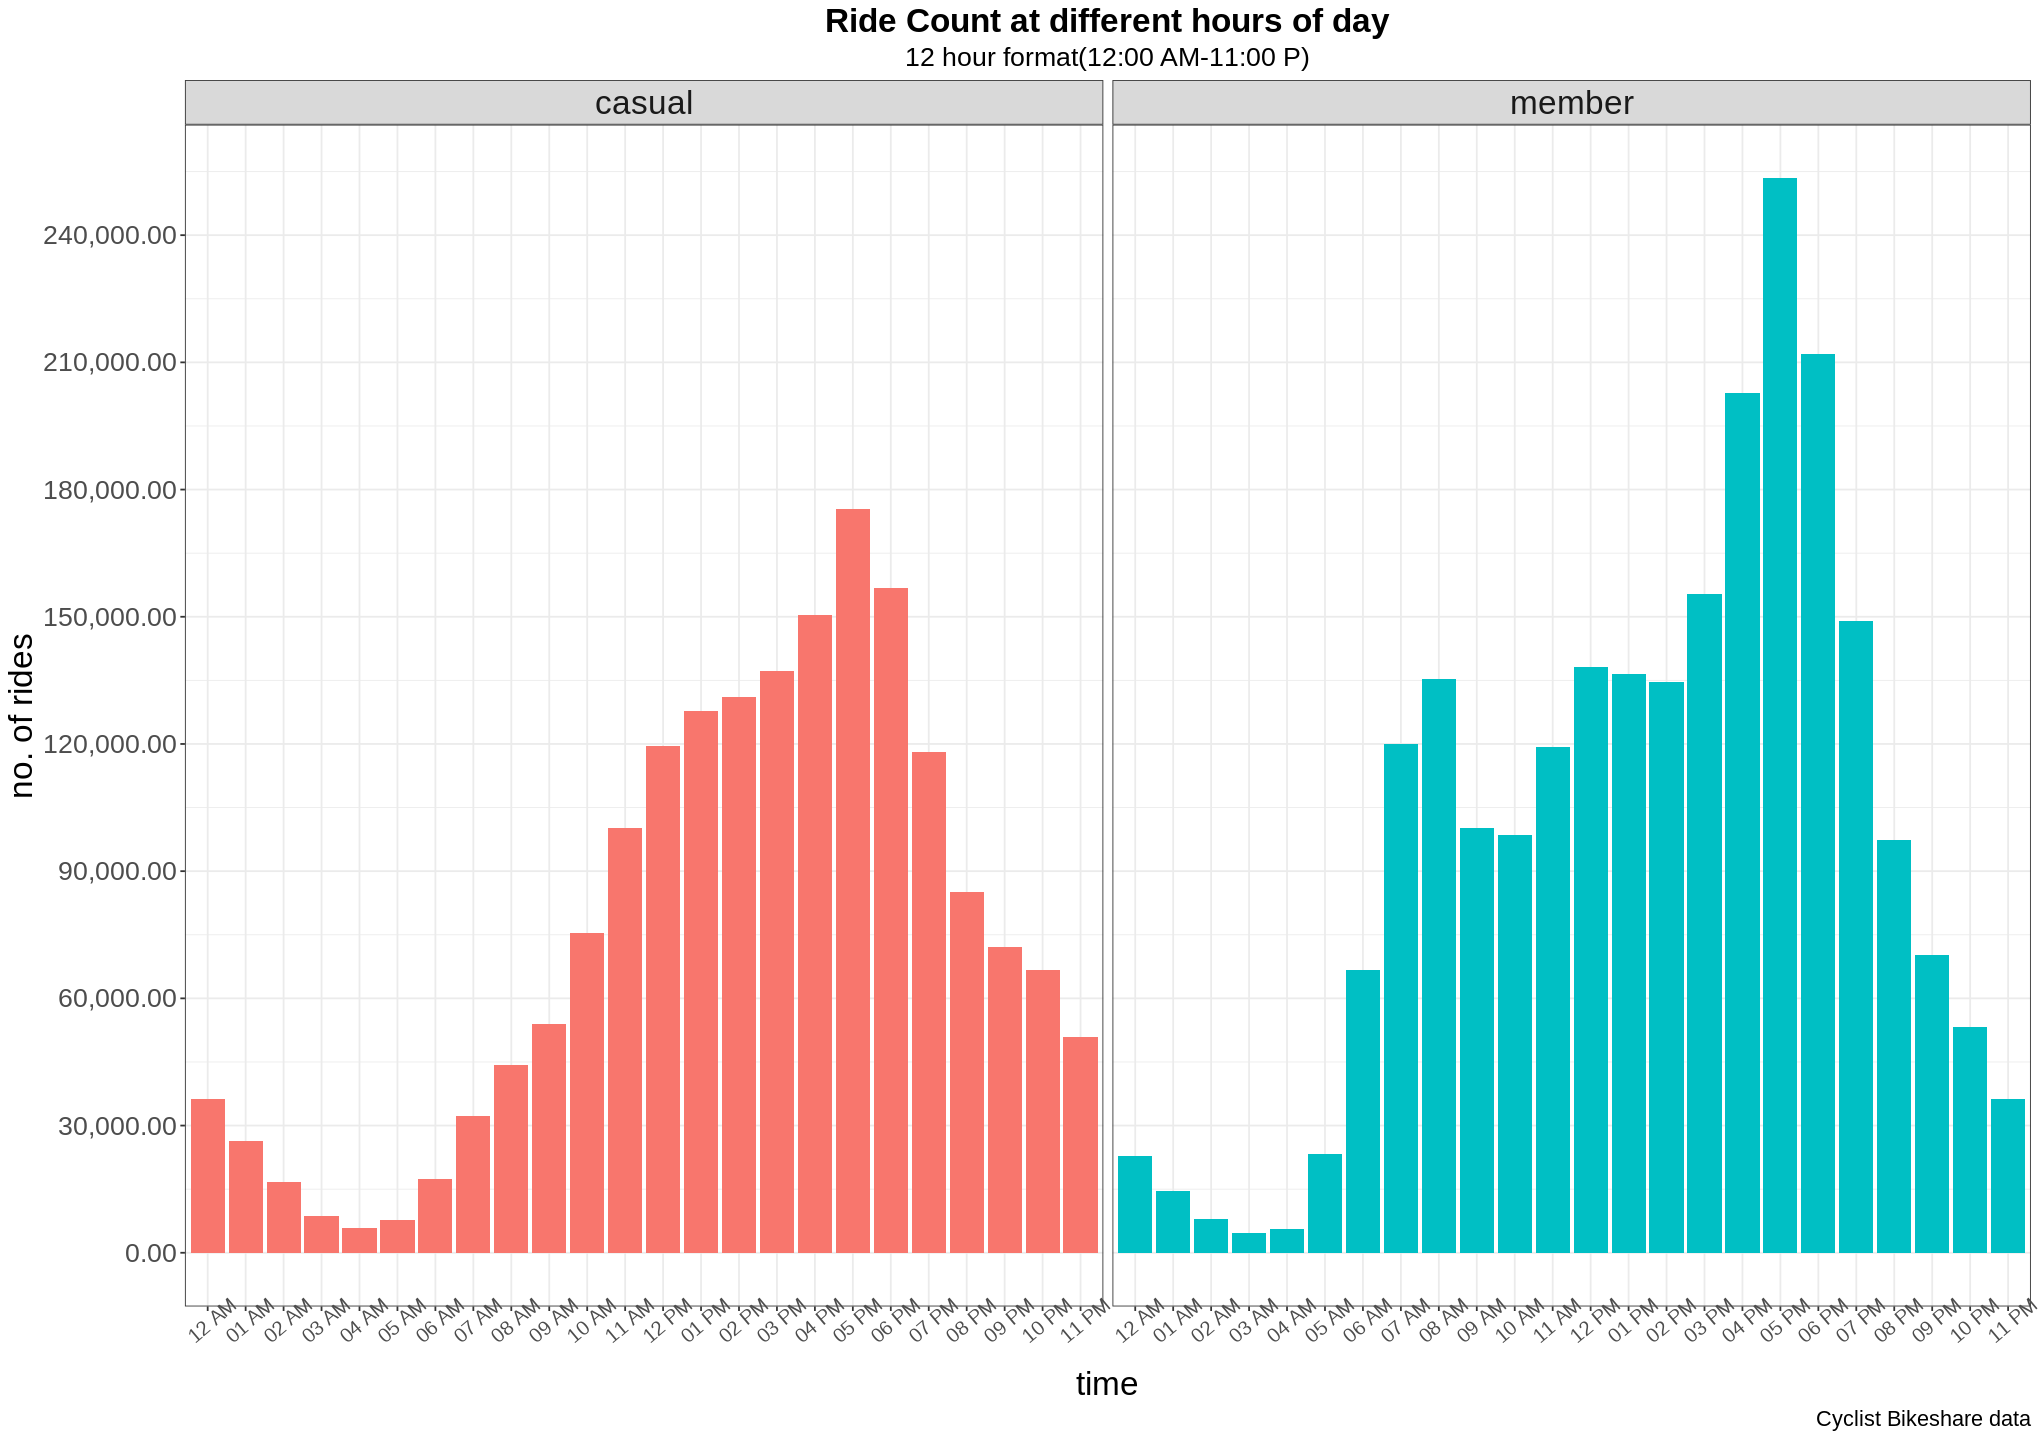

In [72]:
ggplot(df_hour1, aes(x=day_hour, y=n, fill=usertype)) + geom_col()+ theme_bw() +
labs(title="Ride Count at different hours of day", subtitle="12 hour format(12:00 AM-11:00 P)", x="time", y="no. of rides",
   caption = "Cyclist Bikeshare data") +
theme(plot.title = element_text(face="bold", hjust=0.5, size=20), plot.subtitle = element_text(size=16, hjust=0.5), 
axis.title=element_text(size=20), axis.text=element_text(size=16),
axis.text.x = element_text(angle = 40, size=12), legend.position = "none" ,
strip.text.x=element_text(size=20), plot.caption = element_text(size=13)) +
scale_x_discrete(limits = unique(df_hour1$day_hour), labels=unique(df_hour1$day_hour)) +
scale_y_continuous(labels = comma, breaks = seq(0,270000, by = 30000)) +
facet_wrap(~usertype)

options(repr.plot.width = 17, repr.plot.height = 12)

b) By Week

In [73]:
df_week <- df_final

df_week$day_of_week <- ordered(df_week$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
  
df_week <- df_week %>%
  group_by(day_of_week) %>% 
  count(usertype)

df_week

day_of_week,usertype,n
<ord>,<chr>,<int>
Monday,casual,198536
Monday,member,318879
Tuesday,casual,187833
Tuesday,member,353008
Wednesday,casual,191995
Wednesday,member,364139
Thursday,casual,200980
Thursday,member,346596
Friday,casual,261026


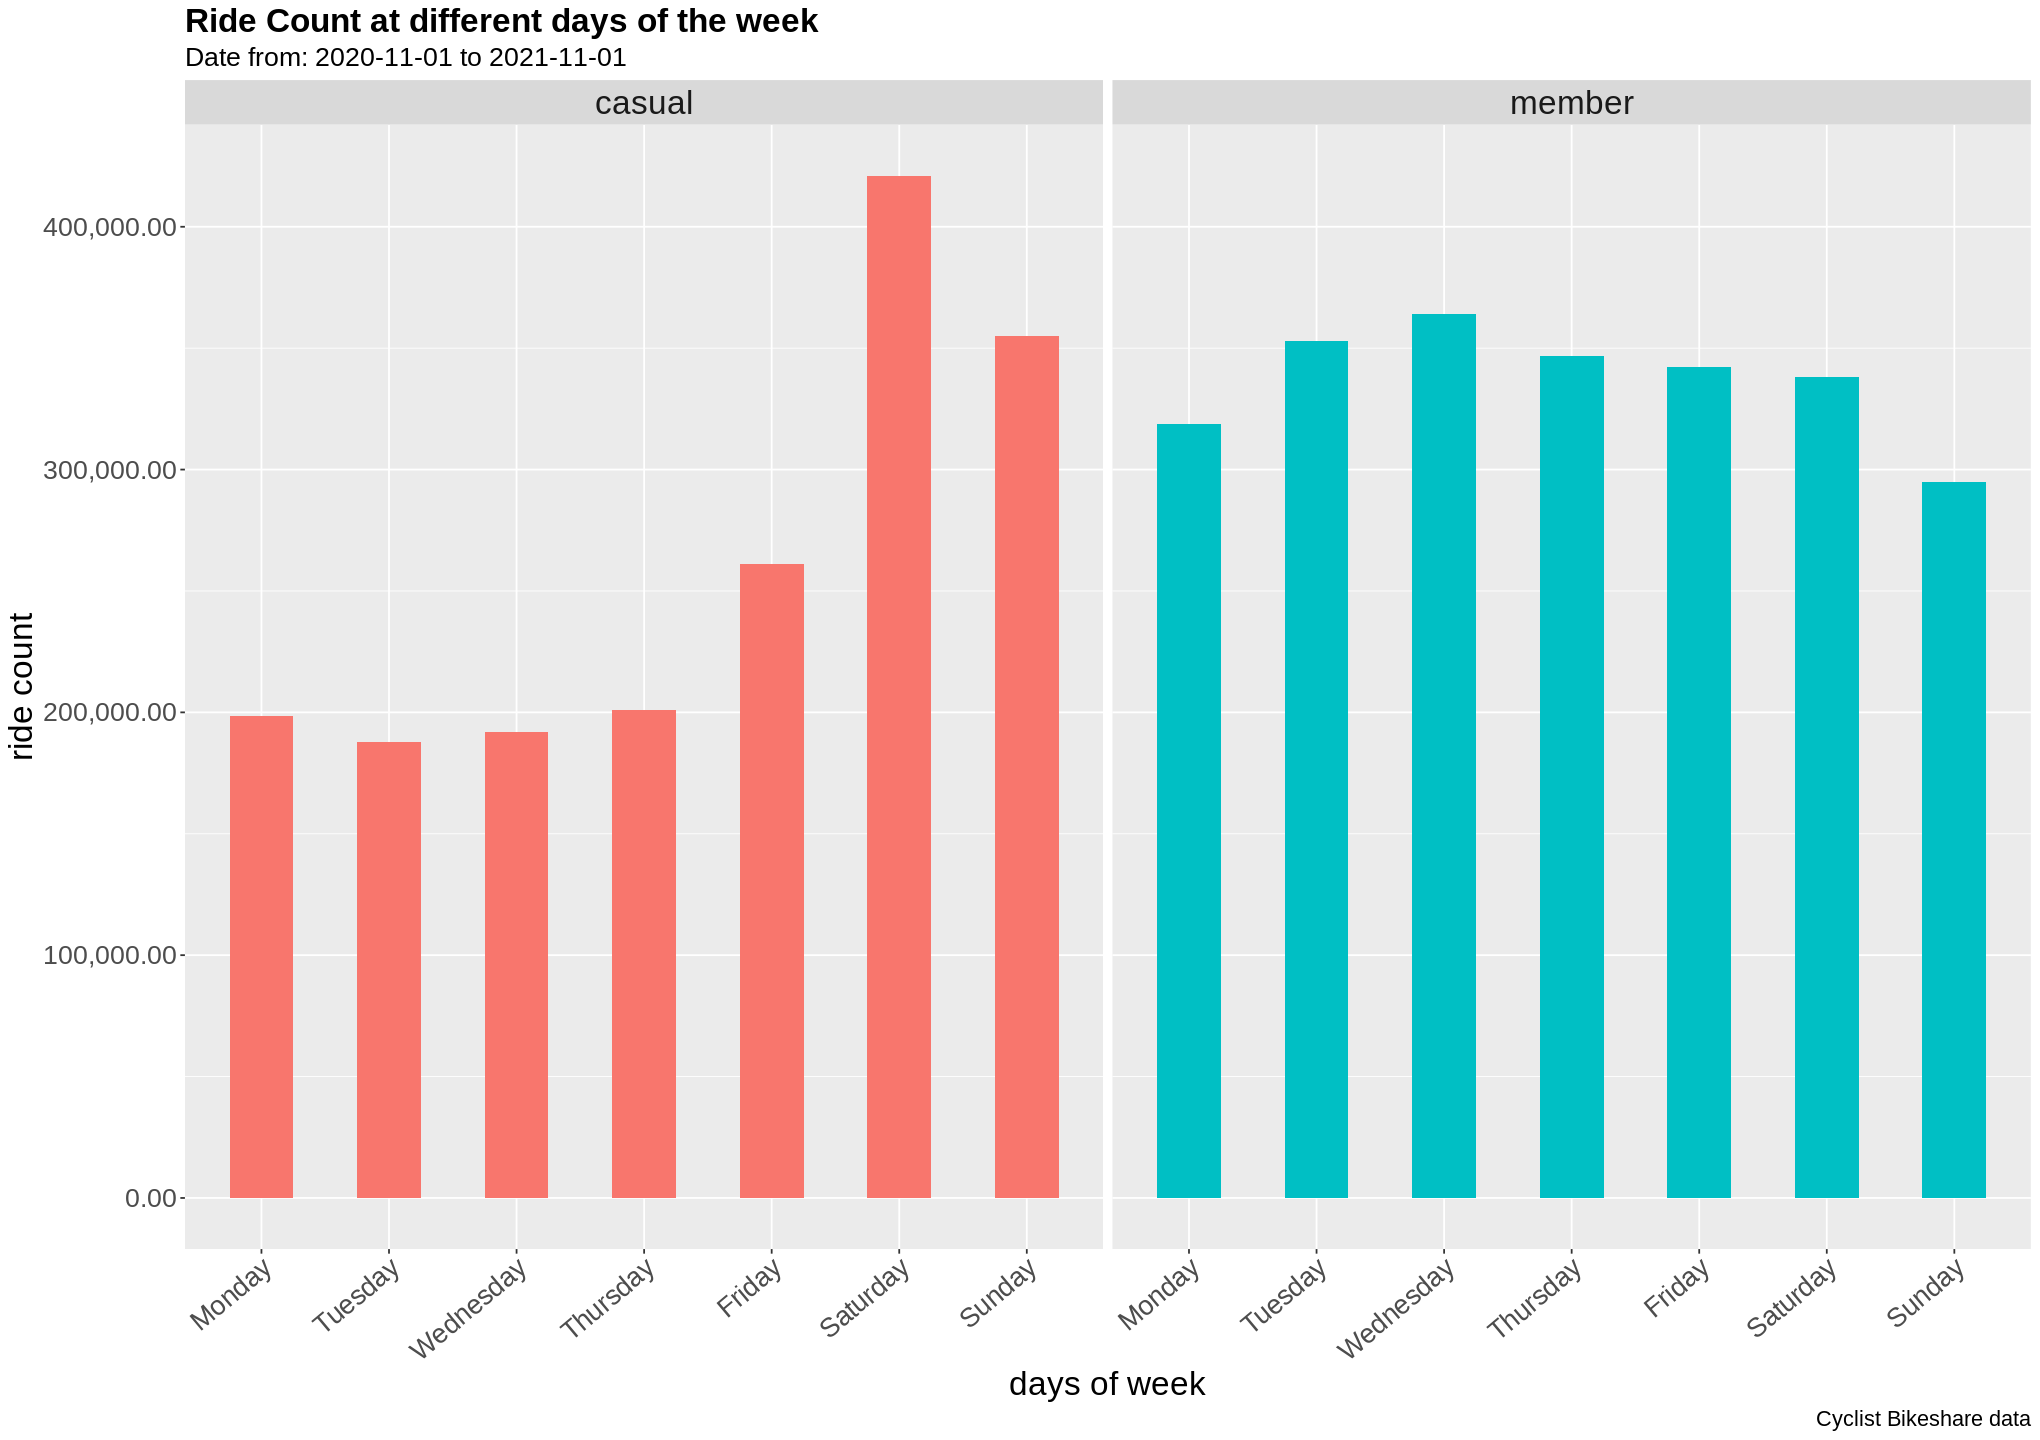

In [74]:
ggplot(df_week, aes(x=day_of_week, y=n, fill=usertype)) +
  geom_col(width=0.5) +
  labs(title = "Ride Count at different days of the week", x="days of week", y="ride count", 
  subtitle = paste0("Date from: ", mindate, " to ", maxdate), caption = "Cyclist Bikeshare data") +
  theme(axis.text.x = element_text(angle = 40, hjust=1),legend.position = "none", 
  plot.title=element_text(size=20, face = "bold"), plot.subtitle=element_text(size=16),
  axis.title=element_text(size=20), axis.text=element_text(size=16), strip.text.x=element_text(size=20), plot.caption = element_text(size=13)) +
  scale_x_discrete(limits = unique(df_week$day_of_week)) +
  scale_y_continuous(labels = comma)+
  facet_wrap(~usertype)

options(repr.plot.width = 15, repr.plot.height = 10)

c) By Month

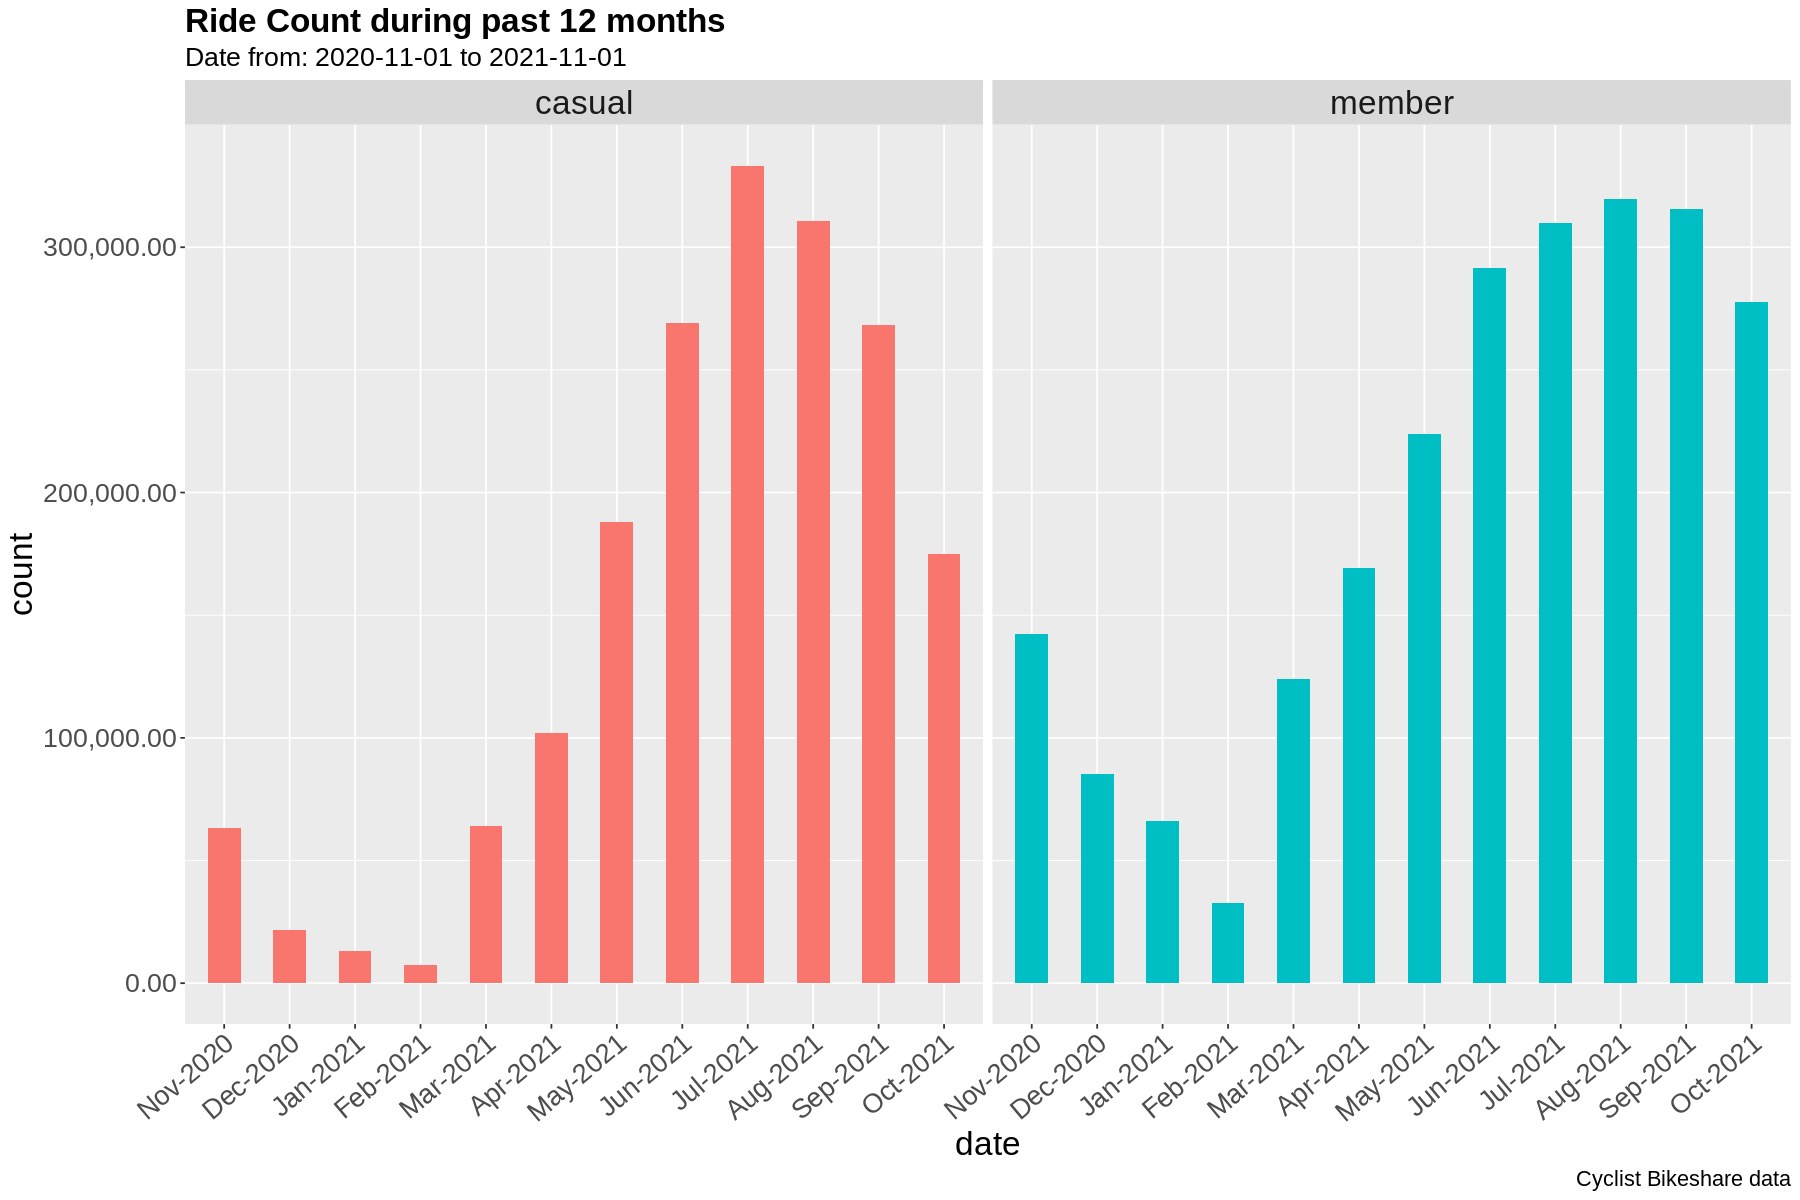

In [75]:
df_month <- df_final %>%
  mutate(date = format(as.Date(started_at), "%b-%Y"))


df_month$date <-  ordered(df_month$date, levels = c("Nov-2020", "Dec-2020", "Jan-2021", "Feb-2021", "Mar-2021", "Apr-2021", "May-2021",
 "Jun-2021", "Jul-2021", "Aug-2021", "Sep-2021", "Oct-2021"))
 
 df_month <- df_month %>%
  group_by(date) %>%
  count(usertype)

ggplot(df_month, aes(x = date , y=n, fill=usertype)) +
  geom_col(width=0.5) +
  labs(title = "Ride Count during past 12 months", x="date", y="count", subtitle = paste0("Date from: ", mindate, " to ", maxdate),
   caption = "Cyclist Bikeshare data") +
  theme(axis.text.x = element_text(angle = 40, hjust=1),legend.position = "none", 
  plot.subtitle=element_text(size=16), plot.title=element_text(size=20, face = "bold"),
  axis.title=element_text(size=20), axis.text=element_text(size=16), strip.text.x=element_text(size=20), plot.caption = element_text(size=13)) +
  scale_x_discrete(limits = unique(df_month$date)) +
  scale_y_continuous(labels = comma) +
  facet_wrap(~usertype)

# **5) Analysis of people who book bike but don't travel**

In [76]:
# people whose trip duration = 0 and trip distance = 0
# should have end station name blank
temp1 <- temp1[(temp1$end_station_name == "" & temp1$end_station_id == ""), ]

In [77]:
dim(temp1)

[1]  2 17

In [78]:
temp1

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,usertype,day_of_week,days_traveled,trip_duration_min,dist_km
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<drtn>,<dbl>
12,D0EE3344F6ECD2CF,electric_bike,2021-04-08 00:13:22,2021-04-08 00:13:22,,,,,41.95,-87.65,41.95,-87.65,member,Thursday,0 days,0 mins,0
77,439720EEBC368AF9,electric_bike,2021-10-17 19:36:30,2021-10-17 19:36:30,,,,,42.00,-87.69,42.00,-87.69,casual,Sunday,0 days,0 mins,0




*   There is not much to travel as only 1 member and 1 casual user is present in the dataset.
*   since their start date and time is same, this might be a data error


# **Limitations**

* Since user identification is not known, we cannot realize user booking patterns.
* Arranging dataset on users who converted from Casual to Members would be useful.
* Since the cause for transportation is not mentioned, it is difficult to give recommendations.
* Casual users may be tourists who travel for leisure and hence opt for just single-ride or full day passes.


# **Conclusion**

* The average ride duration of casual users is more than average ride duration of members.
* Classic bike is preferred by both casual riders and members. But Classic bike is utilized more by casual riders than that by members.
* Count of Short trip duration(15-25 mins) is more for members. Ride count for Long trip duration(40-100+ mins) is comparatively more among casual users.
* Streeter Dr & Grand Ave, Millennium Park and Michigan Ave & Oak St are 3 most popular stations among casual riders. A huge chunk of stations used by casual riders is located near the coastal line while stations used by members is spread out throughout the area.
* Casual users travel more during weekends (as shown by peak in ride count during Friday-Sunday). Ride count for members remains evenly distributed throughout the week and is comparatively low on Sunday.
* Ride count for both members and casual users starts increasing from 6 am and then gradually decreases starting from 5pm. But ride count for member during morning is more than casual users and peaks around 6-7am (which is usually the time when people leave for their respective work zones). Ride count for members shows sudden peak during 4 pm- 6 pm (which might be time when people leave for shift jobs or return home after work). Casual users travel relatively more than members during night(10 pm - 1 am)
* Ride count for both members and casual users starts increasing from April and then decreases from October. Casual users travel mostly during summer (June-September). 
* It can be inferred that casual users travel for leisure while members book bikes for transportation/commuting.

# **Recommendation**

1. Travel cost for single-ride passes and full-day passes can be increased on weekends. This will make membership pricing plans seem more feasible.
2. Membership plans can include incentive/points, early booking options or other perks for long trip duration/distance.
3. Cyclistic may introduce discounts for members riding during night(10pm-1 am). They may also send these users emails regarding perks for travelling at the mentioned time like featuring good shops, food courts, etc. which fall in their usual route. They can also colab with shops to provide discounts for Cyclistic members.
4. Provide personalised emails/ other digital media notifications regarding users average trip duration/distance, usual routes, no. of trips taken while enlightening them regarding benefits they would have gained if they subscribed for memberships.
Cyclistic can also converge on the benefits of using bikes as such like sustainability, cost effectiveness, etc. 
5. Since the usual route for casual users is known, Cyclistic can pull up Hoardings, pamphlets, posters on these routes. Campaign can be run during June-October.
